<h2 style='text-align:center'><b> Supermarket Customer</b></h1>
<h5 style="text-align:center;"> Reza Afriansyah       - JCDS-3004-005</h2>

# 1. Pengenalan
---

## Latar Belakang
Sebuah supermarket ingin memahami lebih dalam perilaku pelanggan mereka untuk mendukung pengambilan keputusan bisnis yang lebih tepat. Untuk itu, mereka merekrut seorang data scientist guna menganalisis data pelanggan yang telah dikumpulkan selama 2 Tahun Terakhir.

## Tujuan
Menyediakan analisis data pelanggan untuk membantu manajemen dalam mengembangkan strategi pemasaran yang lebih efektif, mempertahankan pelanggan bernilai tinggi, serta mengoptimalkan produk, promosi, dan saluran pembelian guna meningkatkan pendapatan dan loyalitas pelanggan.

## Pernyataan Masalah
Eksekutif dan  Manajemen supermarket ingin memahami karakteristik pelanggan, termasuk produk yang paling diminati, efektivitas promosi, dan saluran penjualan yang paling banyak digunakan. Tujuannya adalah untuk:
- Mengelompokkan pelanggan berdasarkan nilai belanjanya,
- Mempertahankan pelanggan dengan nilai tinggi (high-value customers)
- Meningkatkan nilai pelanggan dari segmen bawah dan mencegah potensi churn

Sebagai seorang data analyst, saya akan mencoba menjawab pertanyaan-pertanyaan berikut berdasarkan data pelanggan 2 tahun terakhir:
- Bagaimana segmentasi pelanggan dapat dibentuk berdasarkan total belanja dan perilaku mereka? 
(menggunakan metode LRFM dengan ID pelanggan sebagai acuan)
- Faktor-faktor apa saja yang paling memengaruhi keputusan dan nilai belanja pelanggan? (misalnya: pendapatan, jumlah anak, umur, pendidikan, dan status pernikahan)
- Produk dan promosi mana yang paling efektif dalam menarik pembelian dan loyalitas pelanggan?
- Saluran pembelian apa yang paling banyak digunakan oleh pelanggan dari berbagai segmen? (toko fisik, website, atau katalog)

# 2. Data
---
Untuk menjawab berbagai pertanyaan bisnis yang telah ditetapkan, proyek ini memanfaatkan data historis pelanggan supermarket yang dihimpun dalam kurun waktu dua tahun terakhir.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import datetime as dt
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, spearmanr, kruskal

import warnings
warnings.filterwarnings("ignore")

## 📊 Struktur Dataset

Dataset ini dibagi ke dalam **empat kelompok utama** berdasarkan jenis informasi yang didapat, yaitu: People, Products, Promotion, dan Place.

---

### 1. 🧍 People — Informasi Demografis Pelanggan
Berisi informasi dasar mengenai pelanggan dan kondisi rumah tangga mereka:

- `ID` : Identitas unik pelanggan
- `Year_Birth` : Tahun kelahiran pelanggan
- `Education` : Tingkat pendidikan terakhir
- `Marital_Status` : Status pernikahan
- `Income` : Pendapatan rumah tangga per tahun
- `Kidhome` : Jumlah anak-anak (usia kecil) di rumah
- `Teenhome` : Jumlah remaja di rumah
- `Dt_Customer` : Tanggal registrasi pertama keanggotaan
- `Recency` : Hari sejak terakhir pembelian
- `Complain` : 1 jika pernah komplain dalam 2 tahun terakhir, 0 jika tidak

---

### 2. 🛍️ Products — Riwayat Pengeluaran Pelanggan
Mencerminkan total pengeluaran dalam berbagai kategori produk selama 2 tahun terakhir:

- `MntWines` : Pengeluaran untuk wine
- `MntFruits` : Pengeluaran untuk buah
- `MntMeatProducts` : Pengeluaran untuk daging
- `MntFishProducts` : Pengeluaran untuk ikan
- `MntSweetProducts` : Pengeluaran untuk makanan manis
- `MntGoldProds` : Pengeluaran untuk produk emas

---

### 3. 🎯 Promotion — Respons Pelanggan terhadap Promosi
Menampilkan seberapa sering pelanggan menerima atau merespons promosi:

- `NumDealsPurchases` : Jumlah pembelian dengan diskon
- `AcceptedCmp1` - `AcceptedCmp5` : Respons terhadap masing-masing campaign promosi (1 = diterima)
- `Response` : Respons terhadap campaign terakhir

---

### 4. 🛒 Place — Channel Pembelian yang Digunakan
Menjelaskan cara pelanggan berbelanja melalui berbagai channel:

- `NumWebPurchases` : Pembelian melalui website
- `NumCatalogPurchases` : Pembelian menggunakan katalog
- `NumStorePurchases` : Pembelian langsung di toko
- `NumWebVisitsMonth` : Jumlah kunjungan ke website dalam 1 bulan terakhir

---

Berikut 5 Baris teratas dan terbawah dari dataset supermarket_customer


# 3. Data Understanding & Cleaning
---

📌 **Catatan** 
untuk melihat isi datanya maka dipakai delimiter tab karena pada file csv data perbaris hanya ada satu kolom agar struktur kolom dapat terbaca

isi data:
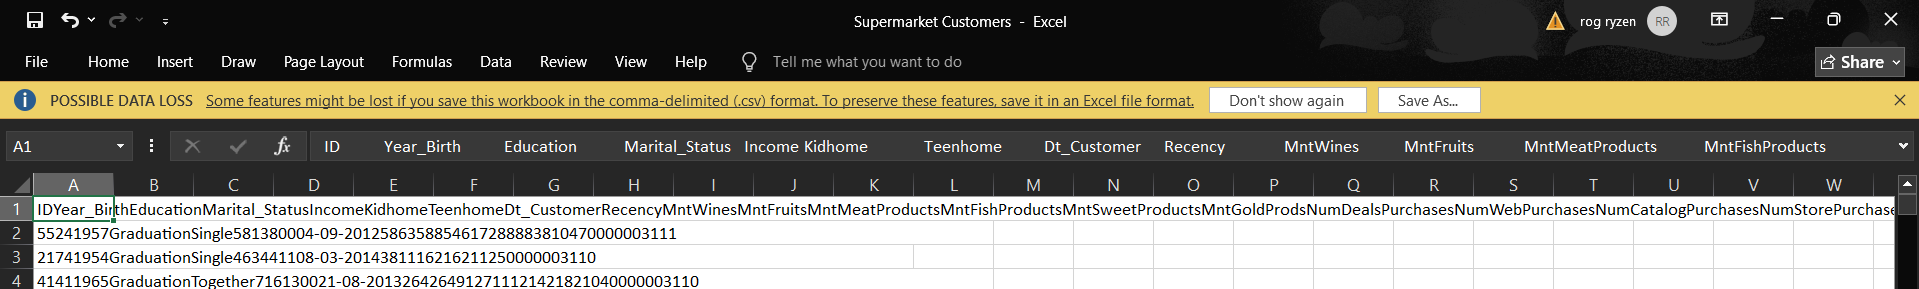

In [4]:
# Membaca data
# Menggunakan delimiter tab karena file CSV hanya memiliki satu kolom per baris
df = pd.read_csv('Supermarket Customers.csv', delimiter='\t', encoding='utf-8')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [5]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [6]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Menampilkan informasi umum tentang DataFrame
pd.set_option('display.max_colwidth', None) 

listItem = []
for col in df.columns:
    listItem.append([col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(
    columns=['Column Name', 'Number of Unique', 'Unique Sample'],
    data=listItem
)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

Berikut poin-poin utama hasil observasi dan persiapan data supermarket_customer:
1. Missing Value
    * Ditemukan nilai kosong pada kolom Income sebanyak 24 dari 2.240 baris data. Penanganan missing value ini akan menyesuaikan proporsi terhadap total data, melalui imputasi atau penghapusan baris, bergantung pada kebutuhan analisis.
2. Penghapusan Kolom Tidak Relevan
    * Terdapat dua kolom, `Z_CostContact` dan `Z_Revenue`, yang hanya memiliki satu nilai unik di seluruh baris data. Kedua kolom ini dihapus karena tidak memberikan variasi atau nilai tambah terhadap analisis.
    * Kolom `Complain` dan `NumWebVisitsMonth` kemungkinan juga akan dihapus karena tidak memiliki kontribusi signifikan pada tujuan analisis saat ini. 
3. Penyesuaian Tipe Data
    * Kolom Dt_Customer(object) diubah tipenya menjadi *datetime* agar mudah digunakan untuk analisis waktu.
4. Penambahan Kolom baru
    * Dibuat kolom baru `Total_Purchase` sebagai hasil penjumlahan dari seluruh pengeluaran produk (wine, fruit, meat, fish, sweets, gold) selama dua tahun terakhir, untuk mempermudah analisis total pengeluaran pelanggan.
    * Kolom `Age` sebagai sebagai umur pelanggan
    * Kolom `Total_Child` untuk menyatukan jumlah anak dari kolom `Kidhome` dan `Teenhome`
5. Pengelompokan Kategori
    * Menyederhanakan kategori pada kolom `Education` dan `Marital_Status` menjadi dua kelompk
    * Pengelompokan data numerik menjadi kategori pada kolom `Age_Category` dan `Income`


In [8]:
# Copy DataFrame untuk analisis lebih lanjut
df1 = df.copy()

## A. Missing Value

In [9]:
# Hitung jumlah total baris
total_rows = len(df1)

# Buat list info missing value per kolom
missing_info = []
for col in df1.columns:
    missing_count = df1[col].isna().sum()
    missing_percent = (missing_count / total_rows) * 100
    formatted_percent = f"{round(missing_percent, 2)}%"  # Tambahkan simbol %
    missing_info.append([col, missing_count, formatted_percent])

# Buat DataFrame deskriptif
missing_df1 = pd.DataFrame(missing_info, columns=['Column', 'Missing Count', 'Missing Percentage'])
missing_df1.index.name = 'Index'

# Tampilkan
missing_df1

,Column,Missing Count,Missing Percentage
Index,,,
0,ID,0,0.0%
1,Year_Birth,0,0.0%
2,Education,0,0.0%
3,Marital_Status,0,0.0%
4,Income,24,1.07%
5,Kidhome,0,0.0%
6,Teenhome,0,0.0%
7,Dt_Customer,0,0.0%
8,Recency,0,0.0%


<Axes: >

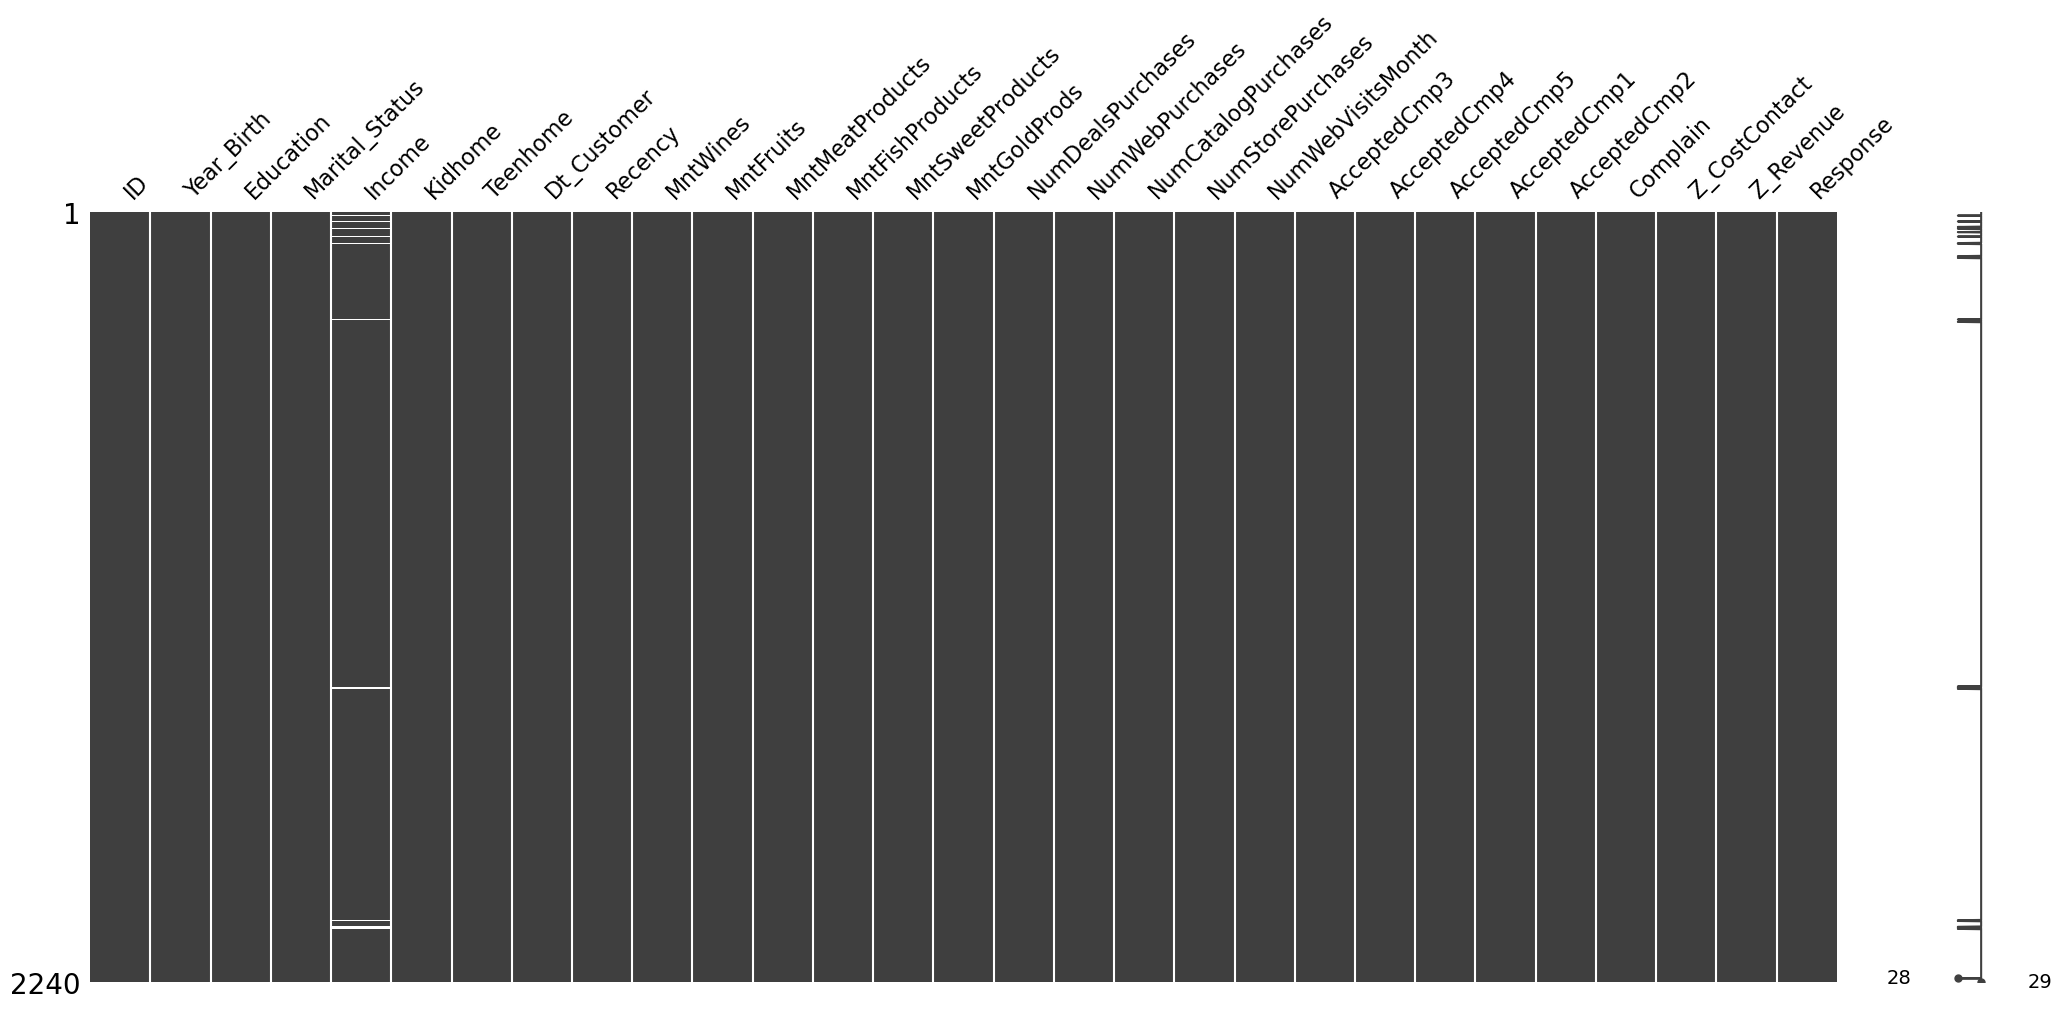

In [10]:
# Sebaran missing value data
msno.matrix(df1)

Sebelum menghapus data missing pada kolom Income, dilakukan uji statistik untuk mengetahui apakah terdapat perbedaan signifikan rata-rata pembelian anggur (MntWines) antara kelompok pelanggan yang memiliki data Income dan yang tidak.

In [11]:
# Uji perbedaan rata-rata MntWines berdasarkan ada/tidaknya data Income (independent t-test)
group_with_income = df1[df1['Income'].notnull()]['MntWines']
group_missing_income = df1[df1['Income'].isnull()]['MntWines']

t_stat, p_value = ttest_ind(group_with_income, group_missing_income, nan_policy='omit')
print(f"T-test p-value: {p_value}")

if p_value > 0.05:
    print("Kesimpulan: Tidak terdapat perbedaan signifikan dalam pembelian anggur antara kelompok dengan dan tanpa data Income.")
else:
    print("Kesimpulan: Terdapat perbedaan signifikan dalam pembelian anggur antara kelompok dengan dan tanpa data Income.")


T-test p-value: 0.11837134170349907
Kesimpulan: Tidak terdapat perbedaan signifikan dalam pembelian anggur antara kelompok dengan dan tanpa data Income.


Hasil uji T menunjukkan p-value = 0.118 (> 0.05), sehingga tidak terdapat perbedaan signifikan dalam pembelian anggur antara pelanggan yang memiliki dan tidak memiliki Income Jadi Data Missing Value dari kolom `Income` dapat dihapus

In [12]:
# Hapus Missing Value Income
df1.dropna(subset=['Income'], inplace=True)

In [13]:
# cek sudah terhapus missing value pada semua data
df1.info()
df1.isna().any()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

Setelah menghapus data null pada kolom `Income`, sekarang dataset tidak terdapat missing value, dan jumlah baris berkurang dari 2.240 menjadi 2.216.

## B. Duplikasi

In [14]:
# Mencari data duplikat
df1[df1.duplicated()]
print(f"Jumlah data duplikat: {df1.duplicated().sum()}")

Jumlah data duplikat: 0


Tidak Terdapat Data Duplikat

## C. Penyesuaian Tipe Data

#### Kolom **`AcceptedCmp`**
Berdasarkan data, terdapat enam kolom promosi, yaitu Promosi 1–5 dan Response. Karena kolom Response memiliki isi yang sama dengan kolom promosi lainnya, kolom tersebut akan diubah namanya menjadi Promosi 6. Selanjutnya, seluruh kolom promosi akan dikonversi ke tipe data kategorikal.

In [15]:
# Ganti nama kolom 'Response' menjadi 'AcceptedCmp6'
df1.rename(columns={'Response': 'AcceptedCmp6'}, inplace=True)

# Ubah tipe data masing-masing kolom promosi menjadi kategorikal satu per satu
df1['AcceptedCmp1'] = df1['AcceptedCmp1'].astype('category')
df1['AcceptedCmp2'] = df1['AcceptedCmp2'].astype('category')
df1['AcceptedCmp3'] = df1['AcceptedCmp3'].astype('category')
df1['AcceptedCmp4'] = df1['AcceptedCmp4'].astype('category')
df1['AcceptedCmp5'] = df1['AcceptedCmp5'].astype('category')
df1['AcceptedCmp6'] = df1['AcceptedCmp6'].astype('category')

In [16]:
print(df1[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp6']].dtypes)


AcceptedCmp1    category
AcceptedCmp2    category
AcceptedCmp3    category
AcceptedCmp4    category
AcceptedCmp5    category
AcceptedCmp6    category
dtype: object


#### Kolom **`Dt_Customer`**

In [17]:
df1['Dt_Customer'].dtype

dtype('O')

Kolom tanggal masih berformat object, sehingga perlu dikonversi ke tipe datetime agar analisis berbasis waktu seperti mencari umur pelanggan dapat dilakukan secara optimal.

In [18]:
# ubah tipe data Dt_Customer menjadi datetime
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'], format='%d-%m-%Y')
print(df1['Dt_Customer'].dtype)

datetime64[ns]


## D. Outlier
Melihat Distribusi Data dari kolom numerik yang akan dianalisis

In [19]:
# Melihat Kolom numerik yang akan dianalisis
df1.select_dtypes(include=['number']).head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue
0,5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11
1,2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11
2,4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11
3,6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11
4,5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11


In [20]:
# Daftar kolom yang ingin dianalisis
outlier_columns = [
    'Year_Birth', 'Income', 'Recency', 'NumDealsPurchases', 
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds'
    ]

# Fungsi IQR untuk deteksi outlier
def detect_outliers_iqr(df1, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df1[(df1[column] < lower) | (df1[column] > upper)]
    return outliers

# Loop untuk print outlier dari setiap kolom
for col in outlier_columns:
    outliers = detect_outliers_iqr(df1, col)
    persen = 100 * len(outliers) / len(df1)
    print(f"Outlier dari kolom '{col}' = {len(outliers)} baris ({persen:.2f}%) dari total data.")


Outlier dari kolom 'Year_Birth' = 3 baris (0.14%) dari total data.
Outlier dari kolom 'Income' = 8 baris (0.36%) dari total data.
Outlier dari kolom 'Recency' = 0 baris (0.00%) dari total data.
Outlier dari kolom 'NumDealsPurchases' = 84 baris (3.79%) dari total data.
Outlier dari kolom 'MntWines' = 35 baris (1.58%) dari total data.
Outlier dari kolom 'MntFruits' = 246 baris (11.10%) dari total data.
Outlier dari kolom 'MntMeatProducts' = 174 baris (7.85%) dari total data.
Outlier dari kolom 'MntFishProducts' = 222 baris (10.02%) dari total data.
Outlier dari kolom 'MntSweetProducts' = 246 baris (11.10%) dari total data.
Outlier dari kolom 'MntGoldProds' = 205 baris (9.25%) dari total data.


Outlier terbanyak terdapat pada kolom `MntFruits` dengan 246 baris

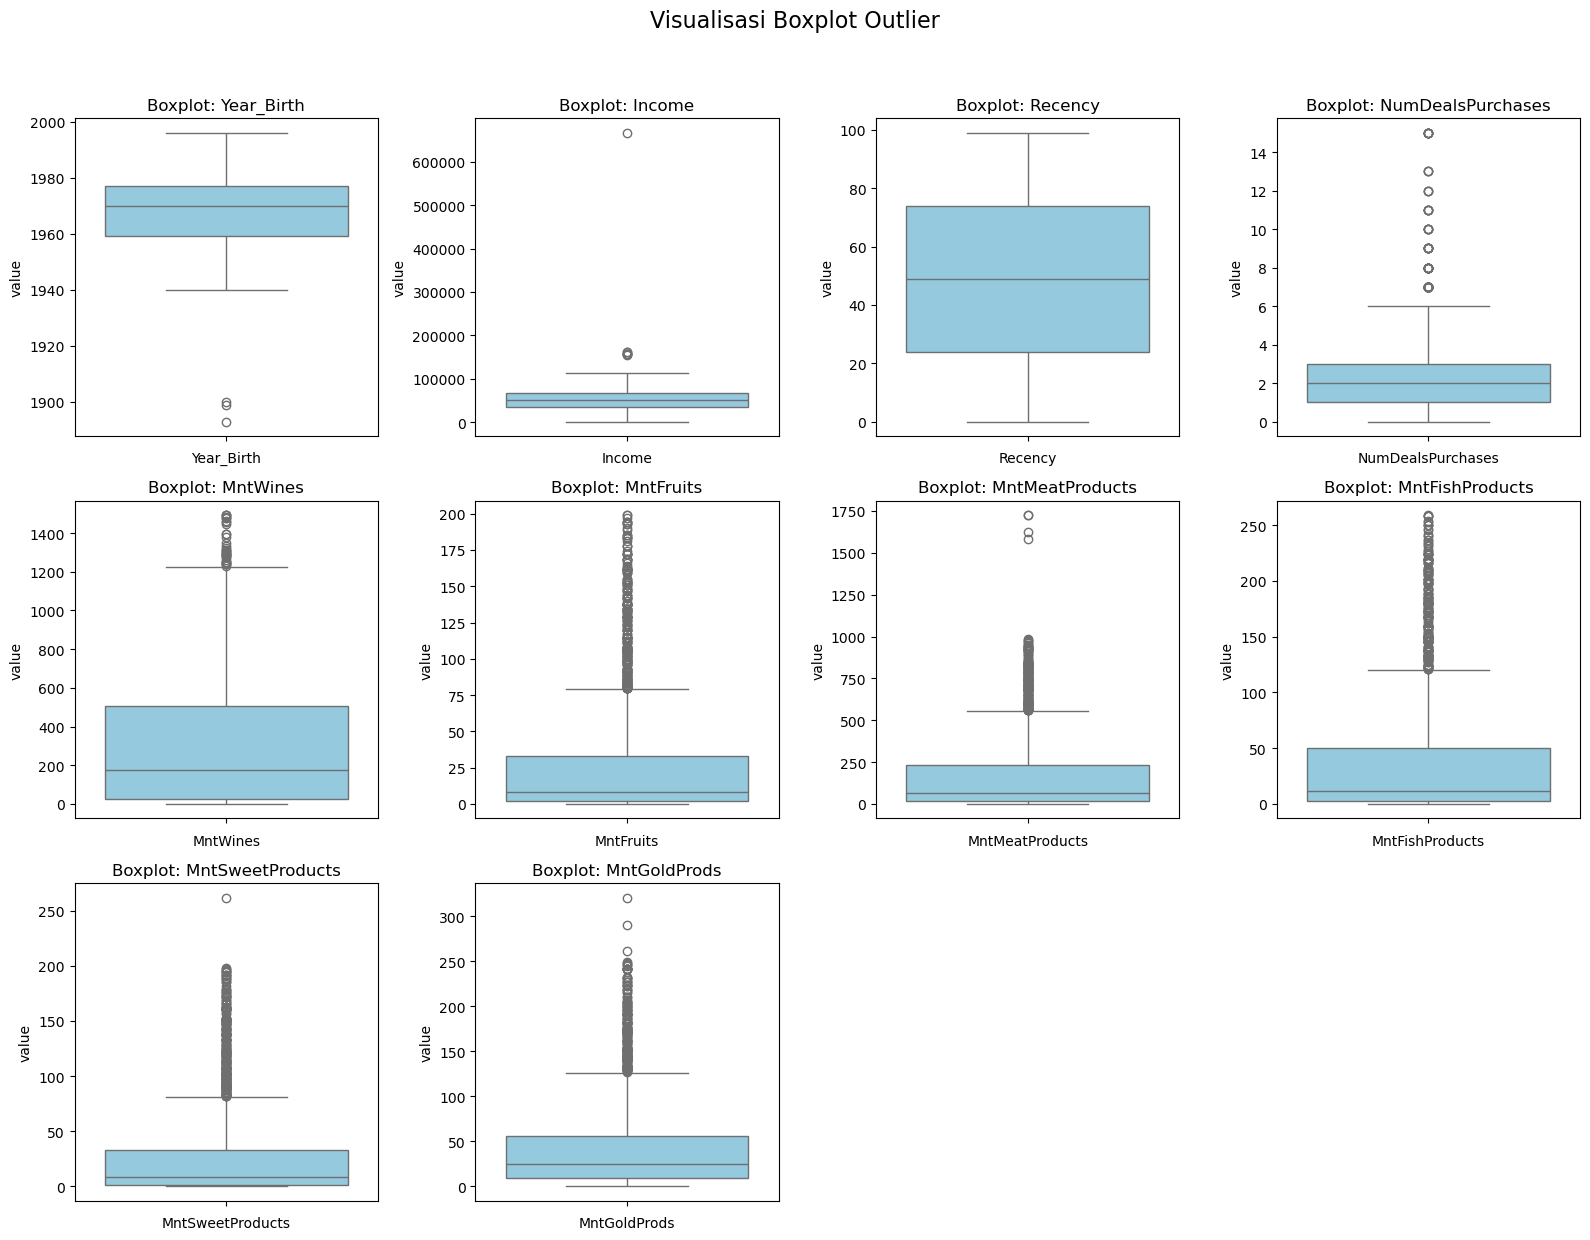

In [21]:
import math

# Jumlah kolom per baris
n_cols = 4
n_plots = len(outlier_columns)
n_rows = math.ceil(n_plots / n_cols)

plt.figure(figsize=(4 * n_cols, 4 * n_rows))

for i, col in enumerate(outlier_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df1, y=col, color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.ylabel('value')

plt.suptitle('Visualisasi Boxplot Outlier', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


Hampir semua kolom numerik memiliki outlier, namun proporsi outlier pada sebagian besar kolom tetap relatif kecil dibandingkan total data. Selain itu, pada beberapa kolom dengan persentase outlier yang lebih tinggi, nilai-nilai ekstrem ini dapat merepresentasikan pelanggan dengan nilai belanja tinggi atau perilaku khusus yang penting untuk analisis bisnis. Oleh karena itu, untuk saat ini, outlier tidak dihapus agar data tetap merepresentasikan seluruh segmen pelanggan, termasuk pelanggan bernilai tinggi.

## E. Kolom Baru & Pengelompokkan Data (Grouping)
Membuat kolom baru dan pengelompokkan data ke dalam beberapa kategori utama agar lebih mudah dianalisis.


#### Kolom **`Age`** dan **`Age_Category`**

Membuat kolom umur dan kategorinya berdasarkan hasil pengurangan tahun pelanggan mendaftar dengan tahun kelahiran pelanggan.

In [22]:
df1['Year_Enroll'] = df1['Dt_Customer'].dt.year  # Ambil tahun dari tanggal daftar
df1['Age'] = df1['Year_Enroll'] - df1['Year_Birth']  # Umur saat daftar
df1['Age'].unique()

array([ 55,  60,  48,  30,  33,  46,  41,  28,  39,  64,  36,  54,  61,
        25,  66,  32,  27,  34,  63,  62,  44,  37,  24,  50,  42,  67,
        43,  70,  38,  16,  45,  58,  57,  35,  47,  26,  31,  65,  40,
        53,  52,  68,  49,  21,  51,  22,  29,  20, 113,  59, 121,  23,
        56, 114,  71,  72,  69,  19,  18,  17,  73], dtype=int64)

Jika dilihat dari isi kolom umur, terdapat pelanggan dengan usia lebih dari 100 tahun. Dalam kasus nyata, sangat kecil kemungkinan terdapat pelanggan dengan umur lebih dari 100 tahun. Oleh karena itu, data tersebut dapat diasumsikan sebagai outlier. Namun, sebelum memutuskan untuk menangani atau menghapusnya, sebaiknya visualisasi terlebih dahulu distribusi data umur untuk melihat sebaran dan pola yang muncul.

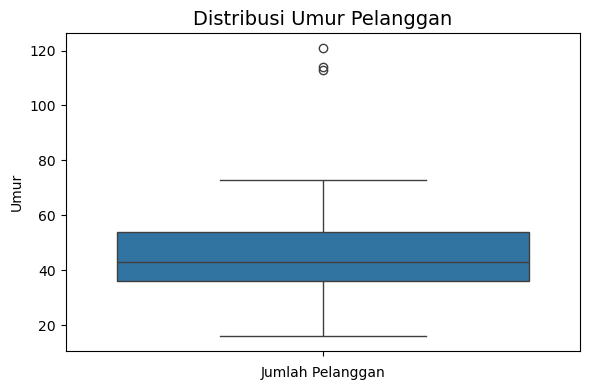

In [23]:
# Melihat distribusi umur pelanggan dengan boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df1, y='Age')
plt.title('Distribusi Umur Pelanggan', fontsize=14)
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Umur')
plt.tight_layout()
plt.show()

In [24]:
# Menghitung IQR untuk mendeteksi outlier pada kolom 'Age'
Q1 = df1['Age'].quantile(0.25)
Q3 = df1['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_age = df1[(df1['Age'] < lower_bound) | (df1['Age'] > upper_bound)]
display(outlier_age[['Age']])

,Age
192,113
239,121
339,114


Berdasarkan grafik distribusi umur pelanggan serta batas atas nilai normal, ditemukan 3 baris data pada kolom Age dengan usia 113, 114, dan 121 tahun. Data tersebut dapat dihapus karena usia pelanggan di atas 100 tahun sangat tidak realistis dalam konteks bisnis ritel atau pemasaran modern. Penghapusan ini bertujuan agar analisis data menjadi lebih representatif terhadap populasi pelanggan sebenarnya.

In [25]:
# Menghapus outlier pada kolom 'Age'
df1 = df1[(df1['Age'] >= lower_bound) & (df1['Age'] <= upper_bound)]

# Melihat jumlah data setelah outlier dihapus
len(df1)

2213

Jumlah data pelanggan berubah menjadi 2.213 baris setelah outlier pada kolom umur dihapus.

In [26]:
# Melihat distribusi umur setelah outlier dihapus
df1['Age'].describe()

count    2213.000000
mean       44.110709
std        11.736750
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64

Kategori umur pada data ini dibuat berdasarkan nilai kuartil (Q1, Q2, dan Q3) dari kolom `Age`.

In [27]:
def age_category(age):
    if age <= 36:
        return 'Young'
    elif age <= 54:
        return 'Adult'
    else:
        return 'Senior'

df1['Age_Category'] = df1['Age'].apply(age_category)
df1['Age_Category'].value_counts()

Age_Category
Adult     1091
Young      607
Senior     515
Name: count, dtype: int64

In [28]:
df1['Age_Category'].dtypes

dtype('O')

In [29]:
# Mengubah format kolom Age_Category menjadi category
df1['Age_Category'] = pd.Categorical(
    df1['Age_Category'],
    categories=['Young', 'Adult', 'Senior'],
    ordered=True
)

df1['Age_Category'].dtypes

CategoricalDtype(categories=['Young', 'Adult', 'Senior'], ordered=True, categories_dtype=object)

#### Kolom **`Income_Category`**

In [30]:
df1['Income'].describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

Memakai Data Q1, Q2 dan Q3 `Income` untuk membuat kategori income

In [31]:
# Buat fungsi kategori income
def income_category(income):
    if income <= 35246:
        return 'Low'
    elif income <= 68487:
        return 'Medium'
    else:
        return 'High'

# Terapkan ke DataFrame
df1['Income_Category'] = df1['Income'].apply(income_category)

# Ubah tipe data kolom Income_Category menjadi kategori
df1['Income_Category'] = df1['Income_Category'].astype('category')

print(df1['Income_Category'].value_counts())
print(df1['Income_Category'].dtypes)

Income_Category
Medium    1106
Low        554
High       553
Name: count, dtype: int64
category


Kategori Income tertinggi adalah Medium dengan jumlah 1108 pelanggan

#### Kolom **`Marital_Status`**

In [32]:
df1['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Terdapat Banyak variasi variabel kolom status pernikahan yang bisa dikategorikan menjadi 2 variabel saja yaitu sendiri atau berpasangan

In [33]:
df1['Marital_Status'] = df1['Marital_Status'].replace({
    'Married': 'Coupled',
    'Together': 'Coupled',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
})
df1['Marital_Status'].value_counts()

Marital_Status
Coupled    1429
Single      784
Name: count, dtype: int64

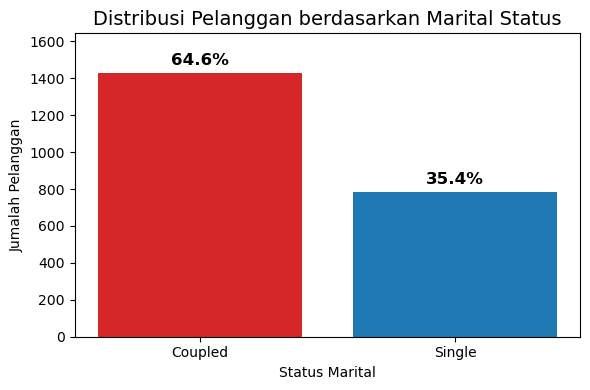

In [34]:
import matplotlib.pyplot as plt

# Hitung jumlah pelanggan per kategori
marital_counts = df1['Marital_Status'].value_counts()
categories = ['Coupled', 'Single']
counts = marital_counts.reindex(categories).values
total = counts.sum()

# Warna kontras: biru untuk Coupled, merah untuk Single
bar_colors = ['#d62728', '#1f77b4']

plt.figure(figsize=(6, 4))
bars = plt.bar(categories, counts, color=bar_colors, width=0.8)

# Tambahkan label persentase di atas setiap bar
for bar, count in zip(bars, counts):
    pct = 100 * count / total
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + (max(counts) * 0.02),
        f'{pct:.1f}%',
        ha='center', va='bottom',
        fontsize=12, fontweight='bold', color='black'
    )

plt.title('Distribusi Pelanggan berdasarkan Marital Status', fontsize=14)
plt.xlabel('Status Marital')
plt.ylabel('Jumalah Pelanggan')
plt.ylim(0, max(counts)*1.15)
plt.tight_layout()
plt.show()


#### Kolom **`Education`**

In [35]:
df1['Education'].value_counts()

Education
Graduation    1116
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64

bisa dibedakan menjadi 2 kategori yaitu Graduate dan non-graduate

In [36]:
# Mengelompokan Level Edukasi
df1['Education'] = df1['Education'].replace({
    'Basic': 'Non-Graduate',
    '2n Cycle': 'Graduate',
    'Graduation': 'Graduate',
    'Master': 'Graduate',
    'PhD': 'Graduate'
})\

# Melihat hasil pengelompokan
df1['Education'].value_counts()

Education
Graduate        2159
Non-Graduate      54
Name: count, dtype: int64

#### Kolom **`Total_Children`** dan **`Total_Amount`**
- Kolom `Total_Children` dibuat dengan menjumlahkan kolom `Kidhome` dan `Teenhome`, karena keduanya sama-sama merepresentasikan jumlah anak-anak dan remaja yang tinggal bersama pelanggan dalam satu rumah tangga.

- Kolom `Total_Amount` merupakan hasil penjumlahan harga seluruh produk yang dibeli oleh pelanggan, yaitu dari kolom-kolom jumlah pembelian produk seperti `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, dan `MntGoldProds`.

In [37]:
# Menyatukan jumlah anak dan remaja
df1['Total_Children'] = df1['Kidhome'] + df1['Teenhome']

# Menyatukan jumlah seluruh produk yang dibeli
product_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df1['Total_Amount'] = df1[product_cols].sum(axis=1)


## F. Hapus Kolom tidak Relevan
Mengahpus kolom yang kurang atau tidak relevan didalam analisis

In [38]:
# Hapus Kolom tidak Relevan
# Gabungkan semua kolom yang ingin dihapus
drop_cols = [
    'Kidhome', 'Teenhome', 'Year_Enroll',
    'Z_CostContact', 'Z_Revenue', 'Complain', 'NumWebVisitsMonth', 
]

df1.drop(columns=drop_cols, inplace=True)
df1.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp6', 'Age', 'Age_Category',
       'Income_Category', 'Total_Children', 'Total_Amount'],
      dtype='object')

## Data yang sudah berrsih
Data selesai dibersihkan, berikut informasi dari data yang sudah bersihkan

In [39]:
listItem = []
for col in df1.columns :
    listItem.append([col, df1[col].dtype, df1[col].isna().sum(),
                    df1[col].nunique(), list(df1[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df1.shape)
dfDesc

(2213, 28)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2213,"[3643, 4743]"
1,Year_Birth,int64,0,56,"[1957, 1994]"
2,Education,object,0,2,"[Non-Graduate, Graduate]"
3,Marital_Status,object,0,2,"[Single, Coupled]"
4,Income,float64,0,1971,"[75825.0, 75903.0]"
5,Dt_Customer,datetime64[ns],0,662,"[2014-01-13T00:00:00.000000000, 2014-04-12T00:00:00.000000000]"
6,Recency,int64,0,100,"[80, 43]"
7,MntWines,int64,0,775,"[739, 55]"
8,MntFruits,int64,0,158,"[38, 85]"
9,MntMeatProducts,int64,0,553,"[333, 222]"


In [40]:
# Copy DataFrame untuk analisis lebih lanjut
df2 = df1.copy()

# 4. Data Analysis

## 1.Bagaimana segmentasi pelanggan dapat dibentuk berdasarkan total belanja dan perilaku mereka? 
(menggunakan metode LRFM dengan ID pelanggan sebagai acuan)

### A. Kalkulasi Nilai LRFM
Setelah `Dt_Customer` bertipe datetime, perhitungan `Length` dilakukan sebagai selisih hari antara tanggal analisis dan tanggal pendaftaran pelanggan. Agar `Length` selalu ≥ `Recency`, digunakan tanggal analisis yang sudah disesuaikan, yaitu tanggal pendaftaran terakhir ditambah selisih maksimum antara `Recency` dan Length sementara. Dengan cara ini, seluruh nilai Length valid secara waktu dan logis.


#### **Length**

In [41]:
# Langkah 1: Hitung selisih hari (Length sementara) antara tanggal max dan setiap pendaftaran
length_temp = (df2['Dt_Customer'].max() - df2['Dt_Customer']).dt.days

# Langkah 2: Cari Recency tertinggi yang lebih besar dari length sementara
selisih = df2['Recency'] - length_temp

# Langkah 3: Cari jumlah hari tambahan minimum agar Length >= Recency untuk semua baris
min_days_needed = selisih.max()

# Langkah 4: Tambahkan hari tersebut ke tanggal analisis
analysis_date = df2['Dt_Customer'].max() + pd.Timedelta(days=int(min_days_needed))

# Langkah 5: Hitung Length final
df2['Length'] = (analysis_date - df2['Dt_Customer']).dt.days

# Validasi: semua Length harus lebih besar atau sama dengan Recency
print((df2['Length'] >= df2['Recency']).all())

True


#### **Recency, Frequency, Monetary**

In [42]:
# Mencari Frekuensi Pembelian
df2['Frequency'] = (
    df2['NumWebPurchases'] +
    df2['NumCatalogPurchases'] +
    df2['NumStorePurchases']
)

# Menghitung Total Pengeluaran untuk Produk
df2['Monetary'] = df2['Total_Amount']

# Membuat DataFrame LRFM
df_lrfm = df2[['ID', 'Length', 'Recency', 'Frequency', 'Monetary']]
df_lrfm.sample(5)

,ID,Length,Recency,Frequency,Monetary
967,7011,722,47,7,93
738,6516,565,37,3,18
1160,4252,195,73,11,301
1323,10971,761,28,12,473
1724,1381,249,20,12,324


Bisa Dilihat Pelanggan ID 
* 619 sudah bergabung sejak 778 hari yang lalu, terakhir belanja 6 hari yang lalu, 12 kali melakukan transaksi dan total pengeluaran belanja sebanyak $326
* 2612 sudah bergabung sejak 205 hari yang lalu, terakhir belanja 68 hari yang lalu, 1 kali melakukan transaksi dan total pengeluaran belanja sebanyak $49

Berikut penjelasan dari masing-masing variabel diatas:

| Variable | Description |
| --- | --- |
| customerID | ID customer|
| length | Usia customer, diperoleh dari selisih hari pertama bertransaksi dengan hari analisis |
| recency | Selisih hari terakhir bertransaksi dengan hari analisis |
| frequency | Jumlah transaksi yang dilakukan oleh customer |
| monetary | Besar pengeluaran yang dilakukan oleh customer |

### B. Assigning Scores
setiap pelanggan diberikan skor berdasarkan kriteria tertentu, seperti perilaku belanja, frekuensi pembelian, atau kategori lainnya. Skor ini digunakan untuk mempermudah proses segmentasi dan analisis pelanggan secara kuantitatif.

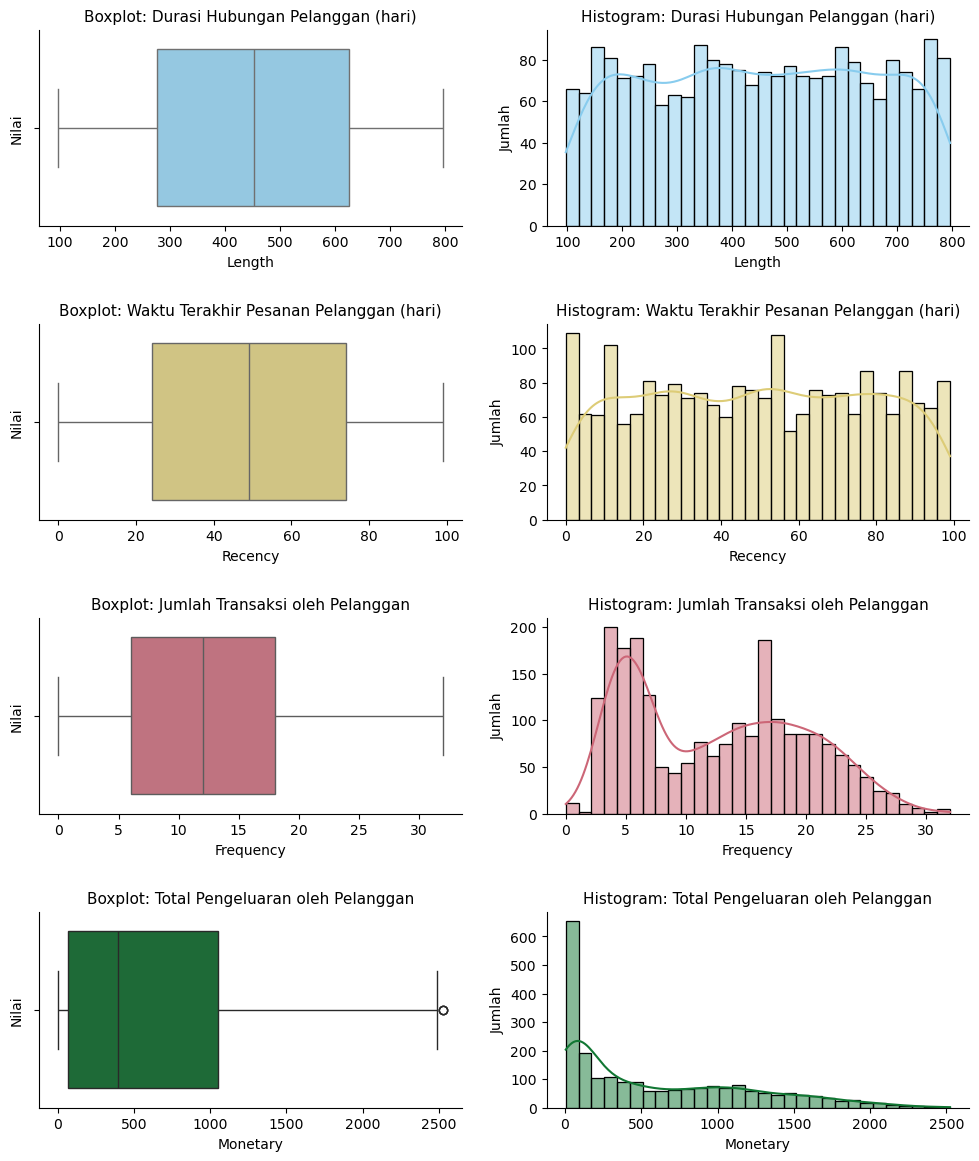

,Length,Recency,Frequency,Monetary
0.0,97.0,0.0,0.0,5.0
0.2,237.4,19.0,5.0,55.0
0.4,382.0,39.0,9.0,197.4
0.6,521.0,58.2,15.0,636.2
0.8,661.0,79.0,20.0,1174.0
1.0,796.0,99.0,32.0,2525.0


In [43]:
# Siapkan layout grid 4×2 (boxplot kiri, histogram kanan)
fig, axs = plt.subplots(4, 2, figsize=(12, 14), gridspec_kw={'hspace': 0.5})

features = ['Length', 'Recency', 'Frequency', 'Monetary']
titles = [
    'Durasi Hubungan Pelanggan (hari)',
    'Waktu Terakhir Pesanan Pelanggan (hari)',
    'Jumlah Transaksi oleh Pelanggan',
    'Total Pengeluaran oleh Pelanggan'
]
colors = ['#88CCEE', '#DDCC77', '#CC6677', '#117733']

for i, feature in enumerate(features):
    # Boxplot (kiri)
    sns.boxplot(data=df_lrfm, x=feature, ax=axs[i][0], color=colors[i])
    axs[i][0].set_title(f'Boxplot: {titles[i]}', fontsize=11)
    axs[i][0].set_xlabel(feature)
    axs[i][0].set_ylabel('Nilai')
    sns.despine(ax=axs[i][0])

    # Histogram (kanan)
    sns.histplot(data=df_lrfm, x=feature, kde=True, bins=30, ax=axs[i][1], color=colors[i])
    axs[i][1].set_title(f'Histogram: {titles[i]}', fontsize=11)
    axs[i][1].set_xlabel(feature)
    axs[i][1].set_ylabel('Jumlah')
    sns.despine(ax=axs[i][1])

plt.tight_layout()
plt.show()

# Tampilkan ringkasan quantile
display(
    df_lrfm[['Length', 'Recency', 'Frequency', 'Monetary']]
    .quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    .round(2)
)

Terdapat kemungkinan 1 anomali dengan Total belanja lebih dari $2.500

#### Scoring Pelanggan
Penilaian pelanggan dilakukan dengan membagi setiap metrik (Length, Recency, Frequency, Monetary) ke dalam 5 kelompok berdasarkan percentil

In [44]:
# Assigning skor ke masing-masing dimensi LRFM
df_lrfm['l_score'] = pd.qcut(df_lrfm['Length'], q=5, labels=[1, 2, 3, 4, 5]).astype(int)

# Untuk Recency, semakin rendah nilainya (baru belanja), skor semakin tinggi
df_lrfm['r_score'] = pd.qcut(df_lrfm['Recency'], q=5, labels=[5, 4, 3, 2, 1]).astype(int)

df_lrfm['f_score'] = pd.qcut(df_lrfm['Frequency'], q=5, labels=[1, 2, 3, 4, 5]).astype(int)

df_lrfm['m_score'] = pd.qcut(df_lrfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5]).astype(int)

df_lrfm[['ID', 'Length', 'Recency', 'Frequency', 'Monetary', 'l_score', 'r_score', 'f_score', 'm_score']].sample(3, random_state=42)

,ID,Length,Recency,Frequency,Monetary,l_score,r_score,f_score,m_score
871,9353,271,61,14,995,2,2,3,4
1319,8749,245,68,4,61,2,2,1,2
1495,10770,251,73,24,1045,2,2,5,4


Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan length, recency, frequency dan monetary ke dalam 5 kelompok yaitu :

1. **Length**  
Length menunjukkan berapa lama (dalam hari) seorang pelanggan telah menjadi member di supermarket sejak pertama kali mendaftar.

   - **5 (Elite Member)**: telah bergabung lebih dari 661 hari yang lalu  
   - **4 (Platinum Member)**: telah bergabung antara 522 hingga 661 hari yang lalu  
   - **3 (Gold Member)**: telah bergabung antara 383 hingga 521 hari yang lalu  
   - **2 (Silver Member)**: telah bergabung antara 238 hingga 382 hari yang lalu  
   - **1 (New Member)**: baru bergabung antara 1 hingga 237 hari yang lalu

2. **Recency**  
Recency menunjukkan berapa hari sejak transaksi terakhir dilakukan. Semakin kecil angkanya, semakin aktif pelanggan.

    - **5 (Very Active)** : Melakukan transaksi dalam ≤ 19 hari terakhir
    - **4 (Active)** : Melakukan transaksi antara 20 hingga 39 hari terakhir
    - **3 (Warm)** : Melakukan transaksi antara 40 hingga 58 hari terakhir
    - **2 (Cold)** : Melakukan transaksi antara 59 hingga 79 hari terakhir
    - **1 (Inactive)** : Melakukan transaksi ≥ 80 hari yang lalu

3. **Frequency**    
Frequency menunjukkan berapa sering pelanggan bertransaksi. Semakin tinggi frekuensi, semakin loyal.
    - **5 (Very Loyal)** : Melakukan transaksi 21 kali atau lebih
    - **4 (Loyal)** : melakukan transaksi 16 Hingga 20 kali
    - **3 (High)** : melakukan transaksi 10 hingga 15 kali
    - **2 (Medium)** : melakukan transaksi 6 hingga 9 kali
    - **1 (Low)** : melakukan transaksi 1 hingga 5 kali.

4. **Monetary**     
Monetary menunjukkan berapa besar total uang yang dikeluarkan pelanggan. Semakin besar spending, semakin bernilai bagi bisnis.
    - **5 (Top Spender)** : Melakukan transaksi dengan total belanja lebih dari $1174.00
    - **4 (High Spender)** : Melakukan transaksi dengan total belanja antara $636.21 hingga $1174.00
    - **3 (Regular Spender)** : Melakukan transaksi dengan total belanja antara $197.41 hingga $636.20
    - **2 (Medium Spender)** : Melakukan transaksi dengan total belanja antara $55.00 hingga $197.40
    - **1 (Low Spender)** : Melakukan transaksi dengan total belanja kurang dari $55.00

#### Labeling Segment
**Total Score Approach**

Pada tahapan ini saya menggunakan cara Total score Approach untuk menjumlahkan l_score, r_score, f_score, dan m_score menjadi rfm_score_total

In [45]:
# Total Score
df_lrfm['lrfm_score_total'] = (
    df_lrfm['l_score'] +
    df_lrfm['r_score'] +
    df_lrfm['f_score'] +
    df_lrfm['m_score']
)

# Fungsi segmentasi berdasarkan total skor (disesuaikan)
def segment_by_total(score):
    if score <= 7:
        return 'Bronze'
    elif score <= 11:
        return 'Silver'
    elif score <= 13:
        return 'Gold'
    elif score <= 16:
        return 'Platinum'
    else:
        return 'Diamond'

df_lrfm['lrfm_segment'] = df_lrfm['lrfm_score_total'].apply(segment_by_total)


In [46]:
df_lrfm[['ID', 'Length', 'Recency', 'Frequency', 'Monetary', 'l_score', 'r_score', 'f_score', 'm_score', 'lrfm_score_total', 'lrfm_segment']].sample(5)

,ID,Length,Recency,Frequency,Monetary,l_score,r_score,f_score,m_score,lrfm_score_total,lrfm_segment
1359,7275,365,34,7,131,2,4,2,2,10,Silver
1849,5010,244,72,4,34,2,2,1,1,6,Bronze
2238,8235,253,8,21,843,2,5,5,4,16,Platinum
847,5935,649,60,20,764,4,2,4,4,14,Platinum
892,10925,263,93,24,1003,2,1,5,4,12,Gold


In [47]:
# Hitung jumlah pelanggan untuk setiap segmen
segment_counts = df_lrfm['lrfm_segment'].value_counts()

# Tampilkan hasil
print("Jumlah pelanggan berdasarkan segmen nilai:")
print(segment_counts)



Jumlah pelanggan berdasarkan segmen nilai:
lrfm_segment
Silver      706
Platinum    592
Gold        426
Bronze      278
Diamond     211
Name: count, dtype: int64


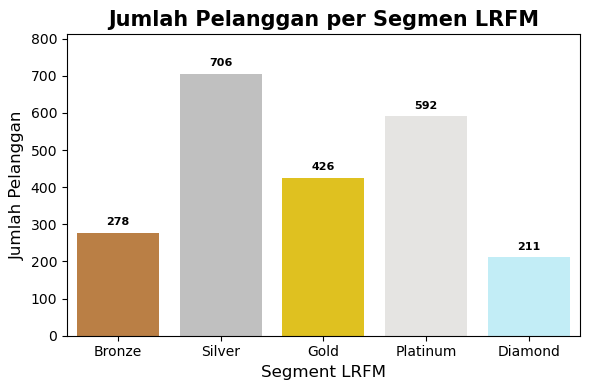

In [48]:
# Hitung jumlah pelanggan per segmen (isi 0 jika ada segmen kosong)
segment_order = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
segment_counts = (
    df_lrfm['lrfm_segment']
    .value_counts()
    .reindex(segment_order)
    .fillna(0)
    .astype(int)
)

# Warna custom per segmen
custom_colors = {
    'Bronze': '#cd7f32',
    'Silver': '#c0c0c0',
    'Gold':   '#ffd700',
    'Platinum': '#e5e4e2',
    'Diamond': '#b9f2ff'
}
colors = [custom_colors[seg] for seg in segment_order]

# Plot barplot
plt.figure(figsize=(6, 4))
bars = sns.barplot(x=segment_order, y=segment_counts.values, palette=colors)

# Tambahkan label pada tiap bar
for i, val in enumerate(segment_counts.values):
    plt.text(i, val + max(segment_counts.values)*0.02, f'{val}', 
             ha='center', va='bottom', fontweight='bold', fontsize=8)

plt.title('Jumlah Pelanggan per Segmen LRFM', fontsize=15, fontweight='bold')
plt.xlabel('Segment LRFM', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.ylim(0, max(segment_counts.values)*1.15)  # Biar label tidak menimpa batas atas
plt.tight_layout()
plt.show()


Member dengan jumlah paling banyak adalah pelanggan segmen Silver yaitu 706

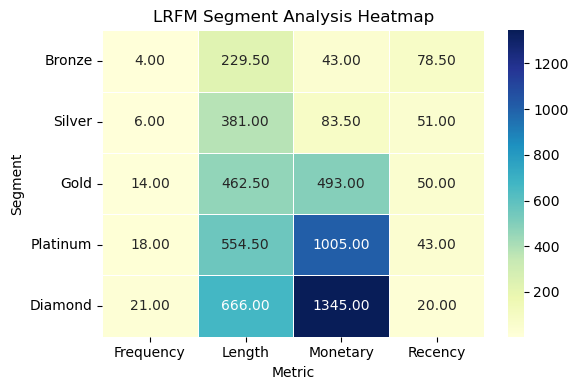

In [49]:
# Membuat pivot tabel: median nilai LRFM per segmen
lrfm_heatmap = df_lrfm.pivot_table(
    index='lrfm_segment',
    values=['Length', 'Recency', 'Frequency', 'Monetary'],
    aggfunc='median'
)

# Urutkan index segmen agar tampil rapi
segment_order = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
lrfm_heatmap = lrfm_heatmap.reindex(segment_order)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(lrfm_heatmap, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('LRFM Segment Analysis Heatmap')
plt.ylabel('Segment')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()


#### Insight
- Segmen Diamond memiliki performa tertinggi dengan median Frequency 21, Length 666 hari, Monetary 1.345, dan Recency 20 hari, menandakan pelanggan sangat aktif, loyal, dan bernilai tinggi meskipun memiliki jumlah pelanggan paling rendah.
- Segmen Silver memiliki jumlah pelanggan terbanyak (706 pelanggan)
- Bronze adalah segmen terlemah, dengan Frequency 4, Length 229.5 hari, Monetary hanya 43, dan Recency tinggi di 78.5 hari
- Pola naik dari Bronze ke Diamond menunjukkan peningkatan bertahap dan konsisten pada Frequency, Length, dan Monetary, serta penurunan Recency—menunjukkan segmentasi bekerja efektif.
-Data sampel memperkuat pola ini:
    - ID 10770 (Gold): Frequency 24, Monetary 1045
    - ID 8749 (Bronze): Frequency 4, Monetary 61
    Walau Length-nya mirip (~250 hari), skor segmen sangat berbeda karena perilaku belanja.

In [50]:
# Membuat salinan dataframe LRFM
df_lrfm1 = df_lrfm.copy()

In [51]:
df_lrfm1.columns

Index(['ID', 'Length', 'Recency', 'Frequency', 'Monetary', 'l_score',
       'r_score', 'f_score', 'm_score', 'lrfm_score_total', 'lrfm_segment'],
      dtype='object')

In [52]:
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp6', 'Age', 'Age_Category',
       'Income_Category', 'Total_Children', 'Total_Amount', 'Length',
       'Frequency', 'Monetary'],
      dtype='object')

Menggabungkan Tabel utama df2 dengan data LRFM

In [53]:
# Ambil kolom baru dari df_lrfm1 yang belum ada di df2
kolom_baru = [col for col in df_lrfm1.columns if col not in df2.columns and col != 'ID']

# Merge hanya kolom baru ke df2
df2 = pd.merge(df2, df_lrfm1[['ID'] + kolom_baru], on='ID', how='left')
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp6', 'Age', 'Age_Category',
       'Income_Category', 'Total_Children', 'Total_Amount', 'Length',
       'Frequency', 'Monetary', 'l_score', 'r_score', 'f_score', 'm_score',
       'lrfm_score_total', 'lrfm_segment'],
      dtype='object')

## 2. Faktor-faktor apa saja yang paling memengaruhi keputusan dan nilai belanja pelanggan? (misalnya: pendapatan, jumlah anak, umur, pendidikan, dan status pernikahan)

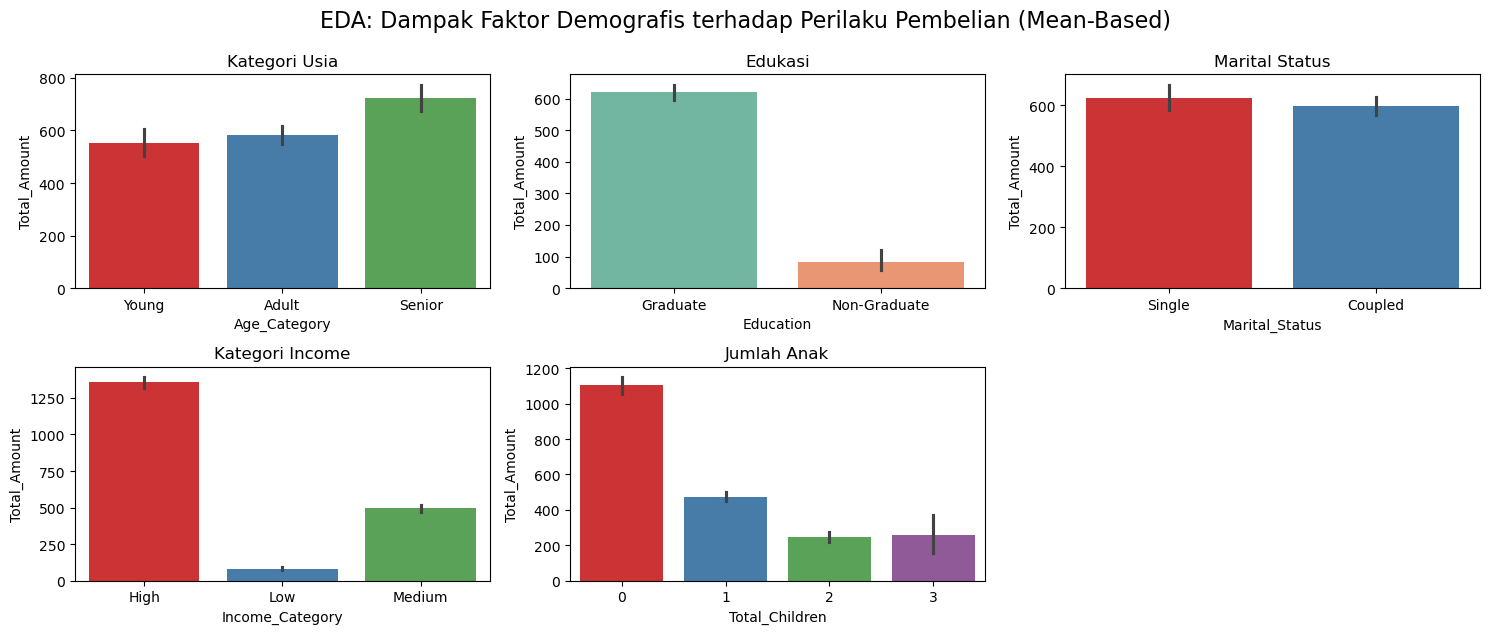

In [54]:
plt.figure(figsize=(15, 6))

# 1. Barplot Mean TotalAmount vs Age_Category
plt.subplot(2, 3, 1)
sns.barplot(data=df2, x='Age_Category', y='Total_Amount', palette='Set1')
plt.title('Kategori Usia')

# 2. Barplot Mean TotalAmount vs Education
plt.subplot(2, 3, 2)
sns.barplot(data=df2, x='Education', y='Total_Amount', palette='Set2')
plt.title('Edukasi')

# 3. Barplot Mean TotalAmount vs Marital_Status
plt.subplot(2, 3, 3)
sns.barplot(data=df2, x='Marital_Status', y='Total_Amount', palette='Set1')
plt.title('Marital Status')

# 4. Barplot Income vs TotalAmount
plt.subplot(2, 3, 4)
sns.barplot(data=df2, x='Income_Category', y='Total_Amount', palette='Set1')
plt.title('Kategori Income')

# 5. Barplot Mean TotalAmount vs TotalChildren
plt.subplot(2, 3, 5)
sns.barplot(data=df2, x='Total_Children', y='Total_Amount', palette='Set1')
plt.title('Jumlah Anak')

# Slot ke-6 dikosongkan
plt.subplot(2, 3, 6)
plt.axis('off')

plt.tight_layout()
plt.suptitle('EDA: Dampak Faktor Demografis terhadap Perilaku Pembelian (Mean-Based)', fontsize=16, y=1.05)
plt.show()

#### Uji Tes

In [55]:
alpha = 0.05

# 1. Age Category vs Total_Amount (Kruskal-Wallis)
age_groups = [df2[df2['Age_Category'] == cat]['Total_Amount'] for cat in df2['Age_Category'].unique()]
stat, p = kruskal(*age_groups)
signif = "✅" if p < alpha else "❌"
print(f"[1] Age Category vs Total_Amount | p-value: {p:.4f} {signif}")
if p < alpha:
    print("   → Terdapat perbedaan signifikan antara kategori umur.")
else:
    print("   → Tidak terdapat perbedaan signifikan antara kategori umur.")
print()  # Spasi antar hasil

# 2. Education vs Total_Amount (Mann-Whitney)
edu_grad = df2[df2['Education'] == 'Graduate']['Total_Amount']
edu_non = df2[df2['Education'] == 'Non-Graduate']['Total_Amount']
stat, p = mannwhitneyu(edu_grad, edu_non, alternative='two-sided')
signif = "✅" if p < alpha else "❌"
print(f"[2] Education vs Total_Amount   | p-value: {p:.4f} {signif}")
if p < alpha:
    print("   → Terdapat perbedaan signifikan antara Graduate dan Non-Graduate.")
else:
    print("   → Tidak terdapat perbedaan signifikan antara Graduate dan Non-Graduate.")
print()  # Spasi antar hasil

# 3. Marital Status vs Total_Amount (Mann-Whitney)
single = df2[df2['Marital_Status'] == 'Single']['Total_Amount']
coupled = df2[df2['Marital_Status'] == 'Coupled']['Total_Amount']
stat, p = mannwhitneyu(single, coupled, alternative='two-sided')
signif = "✅" if p < alpha else "❌"
print(f"[3] Marital Status vs Total_Amount | p-value: {p:.4f} {signif}")
if p < alpha:
    print("   → Terdapat perbedaan signifikan antara Coupled dan Single.")
else:
    print("   → Tidak terdapat perbedaan signifikan antara Coupled dan Single.")
print()  # Spasi antar hasil

# 4. Income_Category vs Total_Amount (Kruskal-Wallis)
income_groups = [df2[df2['Income_Category'] == cat]['Total_Amount'] for cat in df2['Income_Category'].unique()]
stat, p = kruskal(*income_groups)
signif = "✅" if p < alpha else "❌"
print(f"[4] Income_Category vs Total_Amount | p-value: {p:.4f} {signif}")
if p < alpha:
    print("   → Terdapat perbedaan signifikan antara kategori income.")
else:
    print("   → Tidak terdapat perbedaan signifikan antara kategori income.")
print()  # Spasi antar hasil

# 5. Total_Children vs Total_Amount (Kruskal-Wallis)
children_groups = [df2[df2['Total_Children'] == i]['Total_Amount'] for i in sorted(df2['Total_Children'].unique())]
stat, p = kruskal(*children_groups)
signif = "✅" if p < alpha else "❌"
print(f"[5] Total_Children vs Total_Amount | p-value: {p:.4f} {signif}")
if p < alpha:
    print("   → Terdapat perbedaan signifikan antara jumlah anak.")
else:
    print("   → Tidak terdapat perbedaan signifikan antara jumlah anak.")
print()

[1] Age Category vs Total_Amount | p-value: 0.0000 ✅
   → Terdapat perbedaan signifikan antara kategori umur.

[2] Education vs Total_Amount   | p-value: 0.0000 ✅
   → Terdapat perbedaan signifikan antara Graduate dan Non-Graduate.

[3] Marital Status vs Total_Amount | p-value: 0.4451 ❌
   → Tidak terdapat perbedaan signifikan antara Coupled dan Single.

[4] Income_Category vs Total_Amount | p-value: 0.0000 ✅
   → Terdapat perbedaan signifikan antara kategori income.

[5] Total_Children vs Total_Amount | p-value: 0.0000 ✅
   → Terdapat perbedaan signifikan antara jumlah anak.



Dari hasil analisis grafik dan uji statistik, pendapatan (Income_Category) merupakan faktor yang paling menentukan nilai belanja pelanggan. Selain itu, faktor pendidikan, usia, dan jumlah anak juga signifikan, namun pengaruhnya tidak sebesar pendapatan. Status pernikahan tidak berpengaruh nyata pada perilaku belanja. 

In [56]:
df2.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Total_Amount,Length,Frequency,Monetary,l_score,r_score,f_score,m_score,lrfm_score_total,lrfm_segment
0,5524,1957,Graduate,Single,58138.0,2012-09-04,58,635,88,546,...,1617,760,22,1617,5,3,5,5,18,Diamond


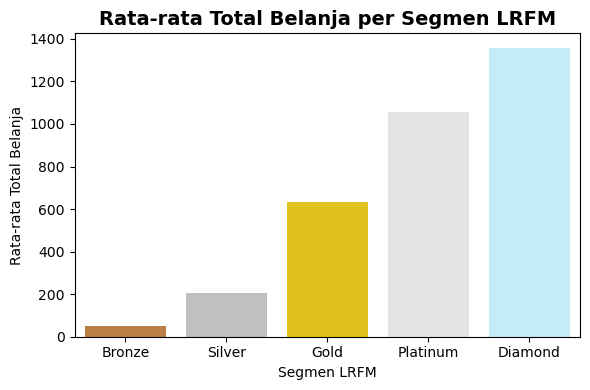

In [57]:
plt.figure(figsize=(6, 4))
order = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
custom_colors = ['#cd7f32', '#c0c0c0', '#ffd700', '#e5e4e2', '#b9f2ff']

sns.barplot(
    data=df2, 
    x='lrfm_segment', 
    y='Total_Amount', 
    order=order, 
    palette=custom_colors, 
    ci=None
)

plt.title('Rata-rata Total Belanja per Segmen LRFM', fontsize=14, fontweight='bold')
plt.xlabel('Segmen LRFM')
plt.ylabel('Rata-rata Total Belanja')
plt.tight_layout()
plt.show()


In [58]:
from scipy.stats import kruskal

# Buat list Total_Amount tiap segmen sesuai urutan segmen
order = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
groups = [df2[df2['lrfm_segment'] == seg]['Total_Amount'] for seg in order]

stat, p = kruskal(*groups)

print(f"Uji Kruskal-Wallis Total_Amount antar segmen LRFM")
print(f"Statistic = {stat:.4f}, p-value = {p:.4f}")

if p < 0.05:
    print("✅ Terdapat perbedaan signifikan rata-rata Total_Amount antar segmen LRFM.")
else:
    print("❌ Tidak terdapat perbedaan signifikan rata-rata Total_Amount antar segmen LRFM.")


Uji Kruskal-Wallis Total_Amount antar segmen LRFM
Statistic = 1400.3111, p-value = 0.0000
✅ Terdapat perbedaan signifikan rata-rata Total_Amount antar segmen LRFM.


Segmentasi LRFM membuktikan efektivitasnya dalam membedakan kelompok pelanggan bernilai tinggi, di mana segmen **Diamond** dan **Platinum** merupakan target utama untuk strategi loyalitas perusahaan.

## 3. Produk dan promosi mana yang paling efektif dalam menarik pembelian dan loyalitas pelanggan?

### Produk

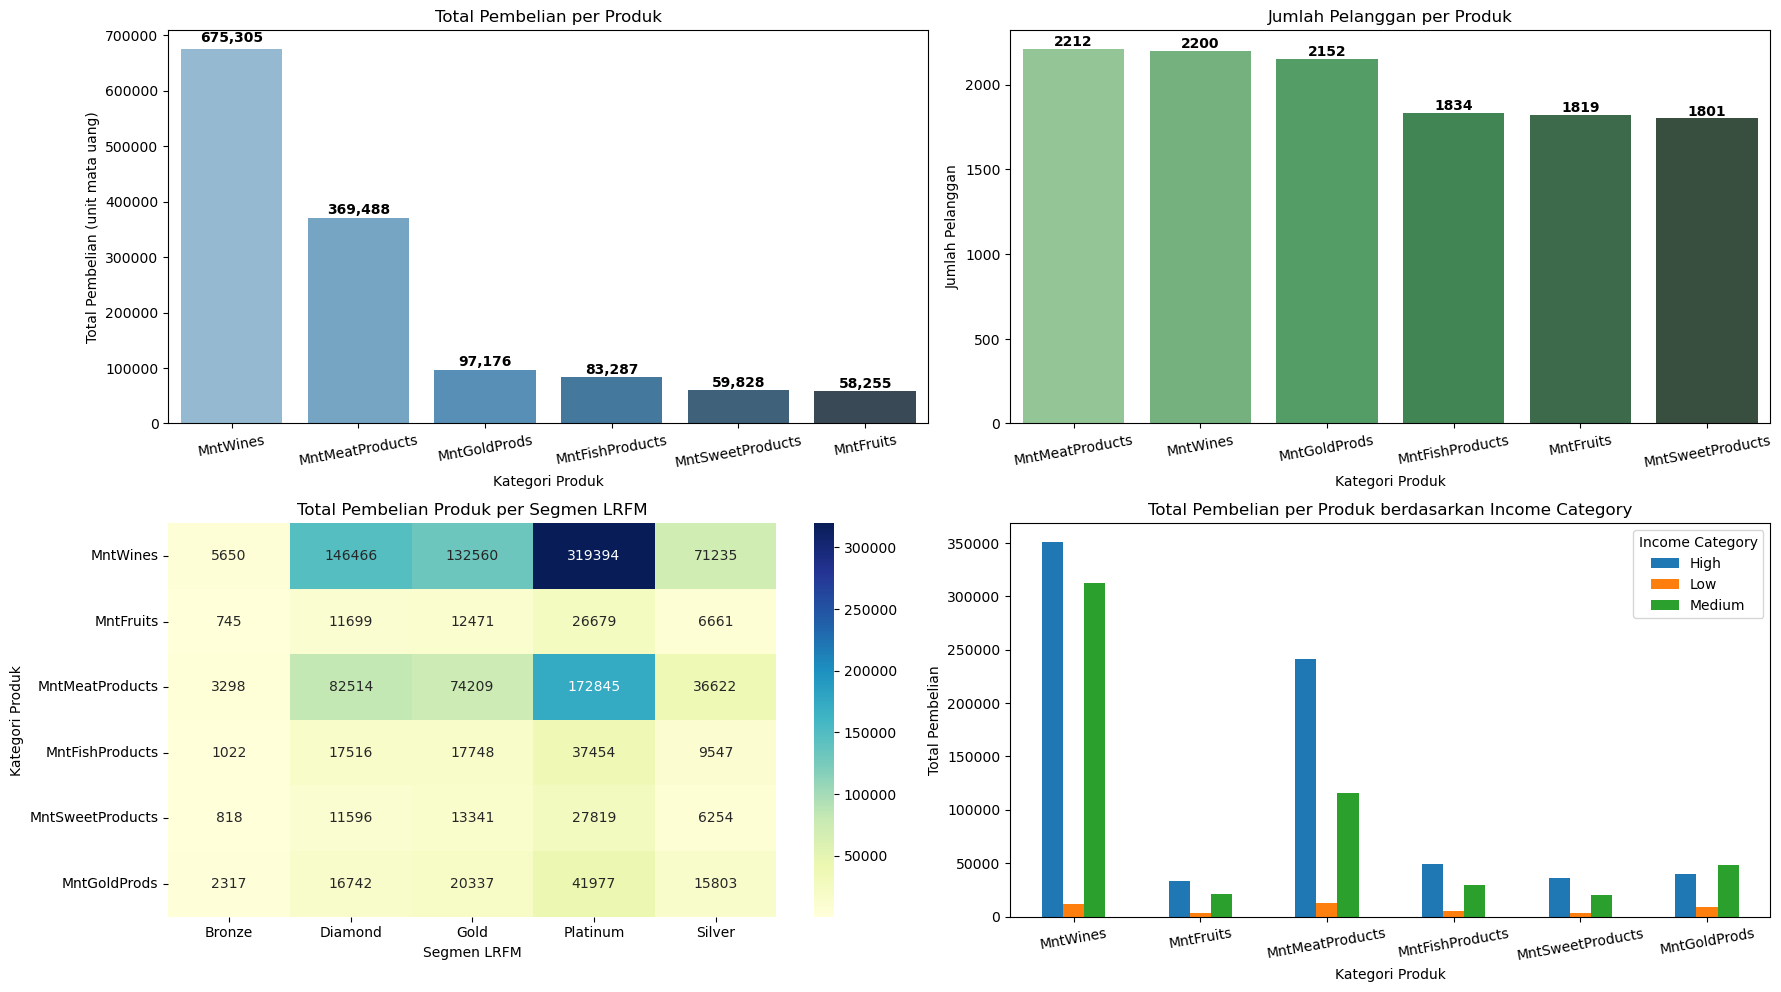

In [59]:
produk_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Data persiapan
total_per_produk = df2[produk_cols].sum().sort_values(ascending=False)
pelanggan_per_produk = (df2[produk_cols] > 0).sum().sort_values(ascending=False)
df_grouped_mean = df2.groupby('lrfm_segment')[produk_cols].mean().T
df_grouped_sum = df2.groupby('lrfm_segment')[produk_cols].sum().T
df_grouped_income = df2.groupby('Income_Category')[produk_cols].sum().T

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# 1. Barplot total pembelian per produk
sns.barplot(ax=axes[0, 0], x=total_per_produk.index, y=total_per_produk.values, palette='Blues_d')
axes[0, 0].set_title('Total Pembelian per Produk')
axes[0, 0].set_xlabel('Kategori Produk')
axes[0, 0].set_ylabel('Total Pembelian (unit mata uang)')
axes[0, 0].tick_params(axis='x', rotation=10)
for i, val in enumerate(total_per_produk.values):
    axes[0, 0].text(i, val + val * 0.01, f"{int(val):,}", ha='center', va='bottom', fontweight='bold')

# 2. Barplot jumlah pelanggan per produk
sns.barplot(ax=axes[0, 1], x=pelanggan_per_produk.index, y=pelanggan_per_produk.values, palette='Greens_d')
axes[0, 1].set_title('Jumlah Pelanggan per Produk')
axes[0, 1].set_xlabel('Kategori Produk')
axes[0, 1].set_ylabel('Jumlah Pelanggan')
axes[0, 1].tick_params(axis='x', rotation=10)
for i, val in enumerate(pelanggan_per_produk.values):
    axes[0, 1].text(i, val + 1, f"{int(val)}", ha='center', va='bottom', fontweight='bold')

# 3. Heatmap total pembelian produk per segmen LRFM
sns.heatmap(df_grouped_sum, annot=True, cmap='YlGnBu', fmt=".0f", ax=axes[1, 0])
axes[1, 0].set_title('Total Pembelian Produk per Segmen LRFM')
axes[1, 0].set_xlabel('Segmen LRFM')
axes[1, 0].set_ylabel('Kategori Produk')

# 4. Barplot total pembelian per produk berdasarkan Income_Category (grouped barplot)
df_grouped_income.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Total Pembelian per Produk berdasarkan Income Category')
axes[1, 1].set_xlabel('Kategori Produk')
axes[1, 1].set_ylabel('Total Pembelian')
axes[1, 1].tick_params(axis='x', rotation=10)
axes[1, 1].legend(title='Income Category')

plt.tight_layout(pad=1.0)
plt.show()


Produk paling efektif adalah `MntWines`, kemudian `MntMeatProducts`, karena memiliki total pembelian dan jumlah pelanggan tertinggi, terutama dari segmen loyal (Platinum/Diamond) dan kategori pendapatan tinggi.

### Promosi

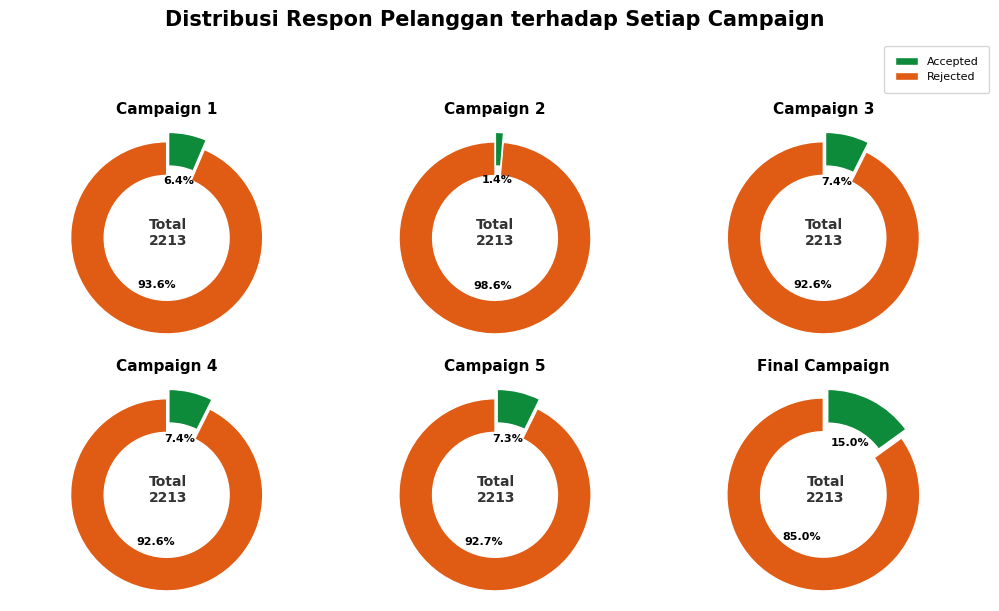

In [60]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

campaign_cols = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6'
]

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

# Warna pada pie 
colors = ["#E05C14", "#0D8B3B"]
labels = ['Rejected', 'Accepted']

for i, col in enumerate(campaign_cols):
    values = df2[col].value_counts().sort_index()
    values = values.reindex([0, 1], fill_value=0)
    total = values.sum()

    wedges, texts, autotexts = axes[i].pie(
        values,
        labels=[None, None],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=(0.05, 0.05),
        wedgeprops=dict(width=0.35, edgecolor='w'),
        pctdistance=0.5
    )
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(8)
    axes[i].set_title(
        f"Campaign {i+1}" if i < 5 else "Final Campaign",
        fontsize=11, fontweight='bold'
    )
    axes[i].axis('equal')
    axes[i].text(0, 0, f'Total\n{total}', ha='center', va='center', fontsize=10, fontweight='bold', color="#333")

for j in range(len(campaign_cols), len(axes)):
    fig.delaxes(axes[j])

# ========== LEGEND (HIJAU DULU, ORANYE KEMUDIAN) ==========
legend_colors = ["#0D8B3B", "#E05C14"] 
legend_labels = ['Accepted', 'Rejected']

legend_handles = [Patch(facecolor=c, edgecolor='w', label=l) for c, l in zip(legend_colors, legend_labels)]
fig.legend(
    handles=legend_handles,
    loc='upper right', bbox_to_anchor=(1, 1),
    fontsize=8, frameon=True, fancybox=True, borderpad=1
)

plt.suptitle('Distribusi Respon Pelanggan terhadap Setiap Campaign', fontsize=15, fontweight='bold', y=1.05)
plt.tight_layout(rect=[0, 0.04, 1, 0.98])
plt.show()

Accepted rate tertinggi sebenarnya terdapat pada Final Campaign (Campaign Response Terakhir) dengan persentase 15.0%.
Campaign dengan accepted rate tertinggi setelahnya adalah Campaign 4 (7.4%).
Campaign 2 memiliki accepted rate paling rendah, yaitu hanya 1.4%, menunjukkan efektivitas promosi paling lemah.

Dari data tesebut bisa juga dilihat korelasi terhadap setiap produk kategori supermarket

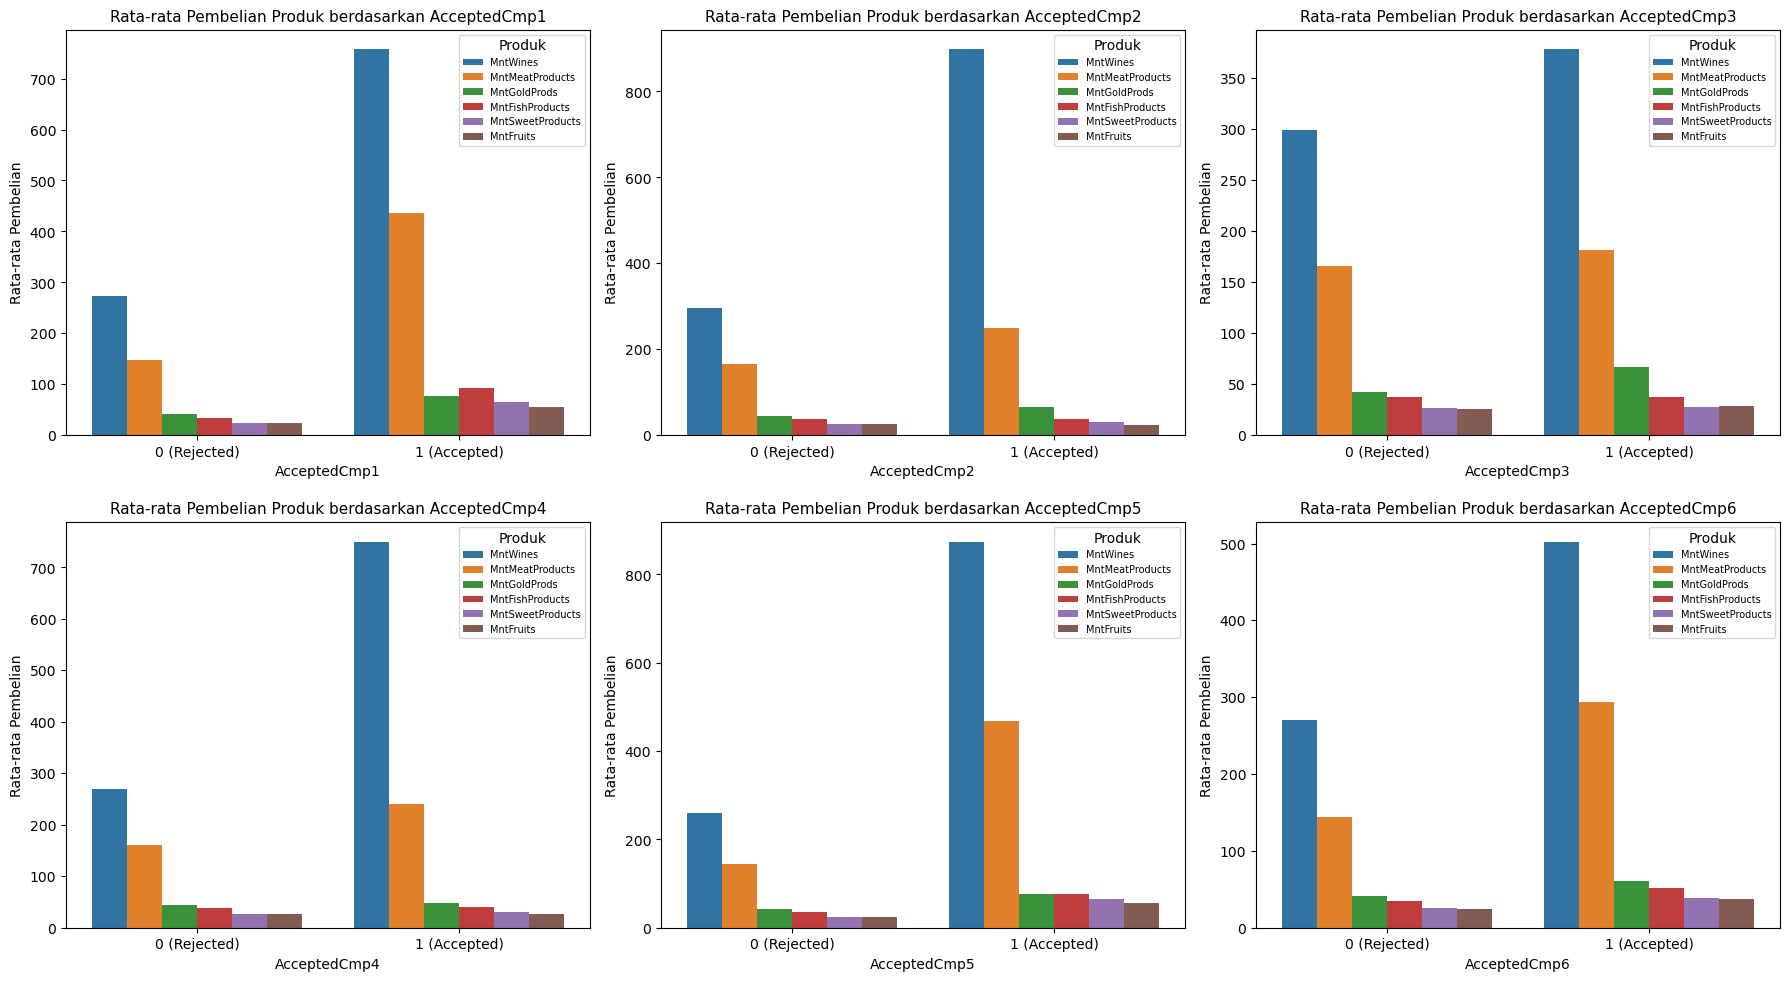

In [61]:
# Kolom campaign dan produk
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']
product_cols = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']

# Warna produk (lebih kontras dan beragam)
product_colors = {
    'MntWines': '#1f77b4',
    'MntMeatProducts': '#ff7f0e',
    'MntGoldProds': '#2ca02c',
    'MntFishProducts': '#d62728',
    'MntSweetProducts': '#9467bd',
    'MntFruits': '#8c564b'
}

# Buat subplot 2 baris × 3 kolom
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(wspace=0.3, hspace=10)
axes = axes.flatten()

# Loop setiap campaign
for i, camp in enumerate(campaign_cols):
    ax = axes[i]
    
    # Rata-rata pembelian tiap produk berdasarkan accepted = 0 / 1
    df_avg = df2.groupby(camp)[product_cols].mean()
    df_avg = df_avg.reset_index().melt(id_vars=camp, var_name='Produk', value_name='Rata2_Pembelian')

    # Barplot
    sns.barplot(
        data=df_avg,
        x=camp,
        y='Rata2_Pembelian',
        hue='Produk',
        palette=product_colors,
        ax=ax
    )
    
    ax.set_title(f'Rata-rata Pembelian Produk berdasarkan {camp}', fontsize=11)
    ax.set_ylabel('Rata-rata Pembelian')
    ax.legend(title='Produk', fontsize=7, loc='upper right')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['0 (Rejected)', '1 (Accepted)'])

# Atur layout supaya tidak saling bertabrakan
plt.tight_layout()
plt.show()


In [62]:
# List campaign
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

print("📊 Uji Mann-Whitney: Pengaruh Campaign terhadap TotalAmount\n")

# Loop untuk semua campaign
for col in campaign_cols:
    group_0 = df2[df2[col] == 0]['Total_Amount']
    group_1 = df2[df2[col] == 1]['Total_Amount']
    
    # Pastikan dua grup memiliki data
    if len(group_0) > 0 and len(group_1) > 0:
        stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')
        hasil = "✅ Signifikan (Tolak H₀)" if p < 0.05 else "❌ Tidak Signifikan (Gagal Tolak H₀)"
        print(f"{col}: p-value = {p} → {hasil}")
    else:
        print(f"{col}: Data tidak cukup untuk uji statistik.")


📊 Uji Mann-Whitney: Pengaruh Campaign terhadap TotalAmount

AcceptedCmp1: p-value = 7.793413773921803e-52 → ✅ Signifikan (Tolak H₀)
AcceptedCmp2: p-value = 1.2621464612319299e-08 → ✅ Signifikan (Tolak H₀)
AcceptedCmp3: p-value = 0.07863710407852356 → ❌ Tidak Signifikan (Gagal Tolak H₀)
AcceptedCmp4: p-value = 3.511212845359309e-30 → ✅ Signifikan (Tolak H₀)
AcceptedCmp5: p-value = 1.8282365643613359e-72 → ✅ Signifikan (Tolak H₀)
AcceptedCmp6: p-value = 4.197972109293424e-29 → ✅ Signifikan (Tolak H₀)


- Dalam analisis ini terlihat bahwa pada kelompok pelanggan yang menerima promosi, produk yang paling banyak dibeli adalah Wines, diikuti oleh Meat Products (Daging).
Menariknya, meskipun tidak menerima promosi, pelanggan tetap menunjukkan kecenderungan tinggi dalam membeli Wines, yang menjadikannya produk dengan performa penjualan tertinggi secara keseluruhan.
- tidak semua campaign berhasil secara merata, Campaign 3 perlu dievaluasi lebih lanjut agar lebih relevan dengan perilaku pelanggan.

## 4. Saluran pembelian apa yang paling banyak digunakan oleh pelanggan dari berbagai segmen? (toko fisik, website, atau katalog)

In [63]:
df2['Age_Category'].unique()

['Senior', 'Adult', 'Young']
Categories (3, object): ['Young' < 'Adult' < 'Senior']

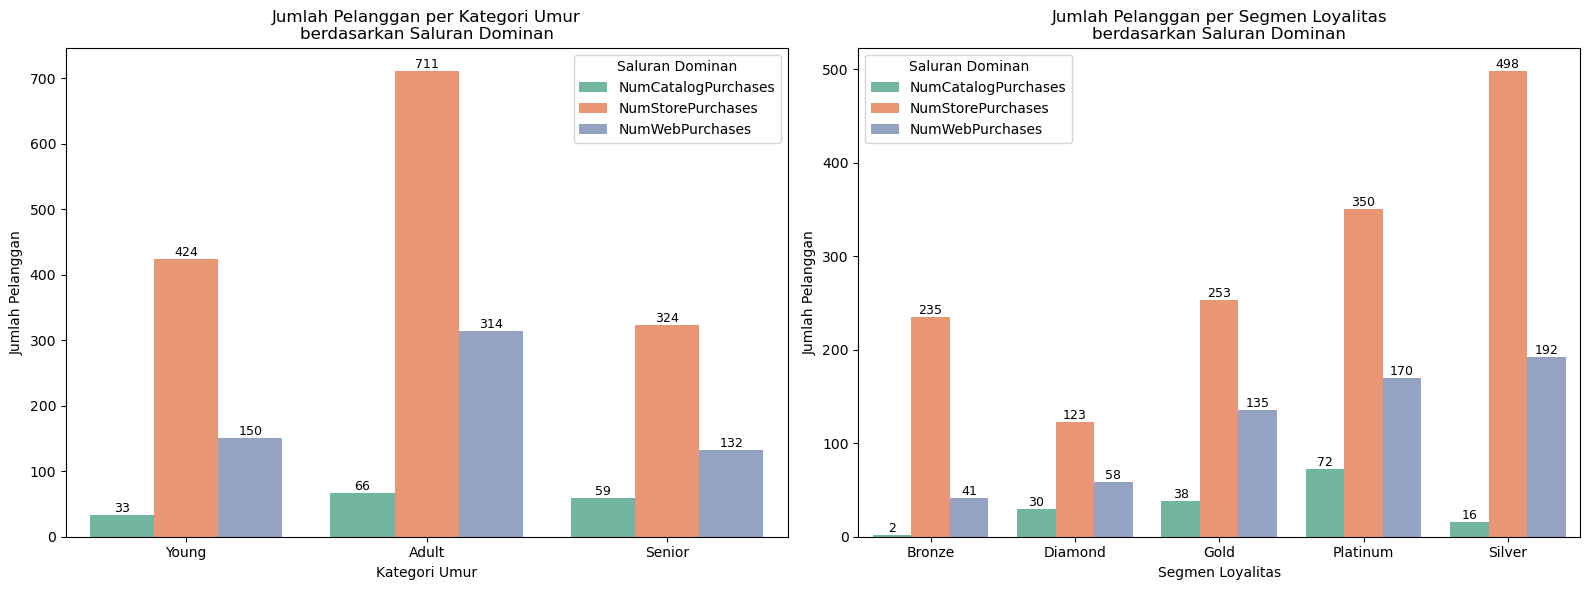

In [64]:
# Buat kolom saluran dominan jika belum
df2['DominantChannel'] = df2[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].idxmax(axis=1)

age_order = ['Young', 'Adult', 'Senior']
segment_order = sorted(df2['lrfm_segment'].dropna().unique().tolist())

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Grafik 1: per kategori umur (kiri)
ax1 = axes[0]
sns.countplot(
    data=df2,
    x='Age_Category',
    hue='DominantChannel',
    order=age_order,
    palette='Set2',
    ax=ax1
)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
ax1.set_title('Jumlah Pelanggan per Kategori Umur\nberdasarkan Saluran Dominan')
ax1.set_xlabel('Kategori Umur')
ax1.set_ylabel('Jumlah Pelanggan')
ax1.legend(title='Saluran Dominan')

# Grafik 2: per segmen loyalitas (kanan)
ax2 = axes[1]
sns.countplot(
    data=df2,
    x='lrfm_segment',
    hue='DominantChannel',
    order=segment_order,
    palette='Set2',
    ax=ax2
)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
ax2.set_title('Jumlah Pelanggan per Segmen Loyalitas\nberdasarkan Saluran Dominan')
ax2.set_xlabel('Segmen Loyalitas')
ax2.set_ylabel('Jumlah Pelanggan')
ax2.legend(title='Saluran Dominan')

plt.tight_layout()
plt.show()

In [65]:
def simple_chi2_test(row, col, nama_uji):
    tab = pd.crosstab(df2[row], df2[col])
    chi2, p, dof, _ = chi2_contingency(tab)
    signif = "✅ Signifikan" if p < 0.05 else "❌ Tidak Signifikan"
    print(f"{nama_uji}")
    print(tab)
    print(f"p-value = {p:.4f} → {signif}\n")

# Uji 1: DominantChannel vs Age_Category
simple_chi2_test('DominantChannel', 'Age_Category', "1. DominantChannel × Age_Category")

# Uji 2: Income_Category vs DominantChannel
simple_chi2_test('Income_Category', 'DominantChannel', "2. Income_Category × DominantChannel")

# Uji 3: lrfm_segment vs DominantChannel
simple_chi2_test('lrfm_segment', 'DominantChannel', "3. lrfm_segment × DominantChannel")


1. DominantChannel × Age_Category
Age_Category         Young  Adult  Senior
DominantChannel                          
NumCatalogPurchases     33     66      59
NumStorePurchases      424    711     324
NumWebPurchases        150    314     132
p-value = 0.0001 → ✅ Signifikan

2. Income_Category × DominantChannel
DominantChannel  NumCatalogPurchases  NumStorePurchases  NumWebPurchases
Income_Category                                                         
High                             105                354               94
Low                                4                412              138
Medium                            49                693              364
p-value = 0.0000 → ✅ Signifikan

3. lrfm_segment × DominantChannel
DominantChannel  NumCatalogPurchases  NumStorePurchases  NumWebPurchases
lrfm_segment                                                            
Bronze                             2                235               41
Diamond                           3

- Supermarket (toko fisik) masih menjadi saluran pembelian utama untuk hampir semua kelompok umur, pendapatan, dan segmen loyalitas.
- Pembelian lewat website/web mulai meningkat khususnya di kelompok usia dewasa (Adult), pendapatan menengah-tinggi, dan pelanggan segmen loyalitas Silver & Platinum.
- Saluran dominan berbeda signifikan antar kategori pelanggan (hasil uji chi-square signifikan, p < 0.05), artinya pemilihan saluran pembelian dipengaruhi oleh usia, pendapatan, dan loyalitas.

# 5. Kesimpulan dan Rekomendasi

## Kesimpulan
1. Faktor-Faktor yang Mempengaruhi Pembelian
    - Pendapatan (Income) merupakan faktor paling berpengaruh terhadap pembelian; pelanggan dengan pendapatan tinggi cenderung belanja lebih banyak. 
    - Jumlah anak berbanding terbalik dengan rata-rata belanja: pelanggan tanpa anak membelanjakan paling banyak, diikuti pelanggan dengan satu anak, dan seterusnya.
    - Usia dewasa adalah kelompok dengan pembelanjaan tertinggi.
    - Tingkat pendidikan graduate mendominasi pada kelompok pembelanja besar, yang berarti Pelanggan yang sudah Graduate memiliki pekerjaan dengan Income tinggi.
    - Status pernikahan tidak berpengaruh berarti terhadap pola belanja.
2. Segmentasi Pelanggan (LRFM)
    - Diamond adalah segmen paling bernilai dengan rata-rata pembelian tertinggi, meskipun jumlahnya hanya 211 orang.
    - Silver adalah segmen dengan jumlah pelanggan terbanyak (706 orang), pembelian menengah, dan potensi loyalitas yang masih bisa ditingkatkan.
    - Bronze adalah segmen dengan aktivitas terendah dan nilai belanja paling kecil.
3. Produk & Promosi
    - Produk yang paling banyak dibeli adalah wine ($675,305) disusul daging, terutama oleh pelanggan berpendapatan tinggi.
    - Wine tetap laku tinggi meski tanpa promosi, menunjukkan daya tarik produk itu sendiri.
    - Campagin 6 adalah promosi paling suskses dengan Accepted rate 15%
    - Campaign 2 memiliki tingkat diterima paling rendah (hanya 1,4%), namun menghasilkan rata-rata pembelian tinggi
    - Campaign 3 diterima oleh lebih banyak pelanggan, namun dampaknya terhadap pembelian sebelum campaign tidak signifikan.
4. Saluran Pembelian
    - Belanja langsung ke Supermarket masih menjadi saluran utama pembelian, dipilih mayoritas pelanggan di semua kelompok umur dan loyalitas.
    - Pelanggan dewasa dan lanjut usia cenderung memilih belanja langsung, diduga karena preferensi terhadap produk segar atau keterbatasan teknologi.
    - Pembelian via website meningkat, terutama pada pelanggan dewasa, berpendapatan menengah-atas, dan segmen loyal (Silver/Platinum). kemungkinan karena pelanggan dewasa yang sibuk bekerja atau dibantu oleh anggota keluarga lebih muda seperti anak dan cucu pelanggan. 

## Rekomendasi
1. Strategi Segmentasi Pelanggan (LRFM)
- Segmen Diamond (Platinum / High-Value Customers)
    Berikan program loyalitas eksklusif seperti:
    - Akses lebih awal terhadap produk baru (early access)
    - Notifikasi ketersediaan produk favorit
    - Diskon pribadi atau undangan event privat eksklusif
- Segmen Menengah (Gold & Silver)
    - Sampaikan secara eksplisit keuntungan menjadi anggota segmen di atasnya untuk mendorong aspirasi naik segmen
    - Tawarkan sistem poin reward, diskon bertingkat, atau bonus pembelian untuk mendorong frekuensi dan nilai transaksi
- Segmen Terendah (Bronze / Inaktif)
    - Tawarkan promosi agresif seperti bundling produk kebutuhan dasar (buah, sayur, snack)
    - Berikan diskon reaktivasi untuk pelanggan yang lama tidak berbelanja, misalnya 3 hingga 5 kali kupon diskon terbatas waktu
- Semua Segmen
    - Buat event loyalitas besar seperti Undian Berhadiah, di mana setiap pembelanjaan minimum $50 mendapatkan 1 kupon undian.
    - Hadiah utama dapat berupa 1 mobil, 10 motor, dan hadiah menarik lainnya.
    - Program ini diharapkan dapat mendorong rata-rata pembelian pelanggan naik ke minimum $50.

2. Strategi Produk & Promosi
- Fokus Produk Unggulan (Wine dan Daging)
    - Pertahankan stok dan kualitasnya.
    - Ciptakan storytelling tentang asal-usul produk, manfaat kesehatan, atau pengguna populer (influencer/chef).
- Optimalisasi Produk Potensial (Ikan, Buah, Snack, Manisan, Gold)
    - Ikan: Demonstrasi pemotongan langsung di tempat untuk menunjukkan kesegaran.
    - Buah: Sampling buah segar sebagai bentuk uji coba.
    - Snack/Manisan: Adakan event tematik atau hadirkan maskot menarik yang mewakili kategori produk ini.
    - Gold: Membuat poster menarik tentang investasi emas, pembelian hadiah istimewa kepada orang yang dicintai dan Prediksi harga emas untuk menarik perhatian pelanggan
- Promosi Tanggal Special.
    - Tingkatkan efektivitas promosi dengan bundling dan diskon pada momen tertentu seperti: tanggal cantik (11.11) dan hari besar (Hari ibu, idul fitri,dll).

3. Strategi Saluran Pembelian
- Supermarket Fisik (Offline)
    - Sediakan area foodstall sebagai tempat nongkrong dengan makanan dan minuman yang lebih murah dan enak dari restoran sekitar.
    - Keluarga Muda: Sediakan area penitipan anak dengan promo potongan harga penitipan jika belanja mencapai nominal tertentu.
    - Lansia: Hadirkan staf pendamping khusus dan jalur pembayaran ekspres (express lane) untuk kenyamanan dan efisiensi.
- Website (Online)
    - Gunakan personalisasi rekomendasi produk berdasarkan histori pembelian pelanggan.
    - Buat fitur bantuan live chat khusus untuk pelanggan lansia.
    - Perhatikan kemudahan tampilan antarmuka (UI/UX), terutama untuk pengguna lanjut usia, dengan huruf besar dan navigasi sederhana.
- Katalog (Cetak/Digital)
    - Pastikan tampilan produk sesuai dengan bentuk asli.
    - Buat desain sederhana dengan informasi ringkas dan mudah dibaca..
    - Sertakan selebritas atau tokoh populer di halaman katalog untuk menarik perhatian pelanggan

Dengan menganalisis perilaku pembelian dan segmentasi pelanggan berbasis data LRFM, produk, dan saluran penjualan, diharapkan hasil ini dapat membantu manajemen dalam menyusun strategi pemasaran yang lebih efektif, mempertahankan pelanggan bernilai tinggi, serta mengoptimalkan alokasi sumber daya promosi dan penjualan demi meningkatkan pendapatan dan loyalitas pelanggan.


# Export Data Baru ke CSV

In [66]:
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp6', 'Age', 'Age_Category',
       'Income_Category', 'Total_Children', 'Total_Amount', 'Length',
       'Frequency', 'Monetary', 'l_score', 'r_score', 'f_score', 'm_score',
       'lrfm_score_total', 'lrfm_segment', 'DominantChannel'],
      dtype='object')

In [67]:
# Copy DataFrame untuk analisis lebih lanjut
df3 = df2.copy()

In [70]:
drop_cols = [
    'l_score', 'r_score', 'f_score', 'm_score','Total_Accepted_Before_Cmp2']
df3_export = df3.drop(columns=drop_cols)
df3_export.to_csv('customer_data_export.csv', index=False)


KeyError: "['Total_Accepted_Before_Cmp2'] not found in axis"

In [72]:
df3.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp6', 'Age', 'Age_Category',
       'Income_Category', 'Total_Children', 'Total_Amount', 'Length',
       'Frequency', 'Monetary', 'l_score', 'r_score', 'f_score', 'm_score',
       'lrfm_score_total', 'lrfm_segment', 'DominantChannel'],
      dtype='object')